In [1]:
import os
import re
import csv
import requests
from tqdm import tqdm

# === CONFIGURATION ===
# Directory containing the tool output files.
reports_dir = "/Users/hassnain/Desktop/oopsla/cargo-sherlock/evaluation/rq3/random1000/"

# Output CSV file to create.
output_csv = "librs_random.csv"

# Base URL for checking presence on lib.rs
lib_rs_base = "https://lib.rs/crate/"

# Regular expression to extract crate name and version from the filename.
# For example, "uci-0.2.3" will yield:
#   - crate_base: "uci"
#   - version: "0.2.3"
pattern = re.compile(r'^(.*)-(\d+\.\d+\.\d+)$')

# Open the CSV file for writing and write the header.
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Crate Name", "Severity Label", "On lib.rs"])

    # Process each report file and write the result immediately.
    for filename in tqdm(os.listdir(reports_dir), desc="Processing reports"):
        file_path = os.path.join(reports_dir, filename)
        # Skip if not a file.
        if not os.path.isfile(file_path):
            print("Invalid file:", filename)
            continue

        # Get the filename without extension.
        match = pattern.match(filename)
        if not match:
            print("Filename doesn't match expected pattern:", filename)
            continue

        # Extract the crate base and version.
        crate_base = match.group(1)  # e.g. "uci" from "uci-0.2.3"
        version = match.group(2)
        # For reporting, we keep the full crate name (filename without extension).
        full_crate = filename

        # Read the file content to extract the severity label.
        with open(file_path, 'r') as f:
            content = f.read()
        match_label = re.search(r'Severity Label:\s*(\S+)', content)
        severity = match_label.group(1).strip() if match_label else "UNKNOWN"

        # Build the lib.rs URL using only the crate base (without version).
        lib_rs_url = f"{lib_rs_base}{crate_base}"
        try:
            response = requests.get(lib_rs_url)
            # print("response:", response.status_code, lib_rs_url)
            on_lib_rs = "Yes" if response.status_code == 200 else "No"
        except Exception as e:
            print(f"Error checking {lib_rs_url}: {e}")
            on_lib_rs = "No"

        # Write the result row to the CSV.
        writer.writerow([full_crate, severity, on_lib_rs])

print(f"Output CSV created: {output_csv}")


Processing reports: 100%|██████████| 960/960 [25:34<00:00,  1.60s/it]  

Output CSV created: librs_random.csv


In [2]:
import os
import re
from tqdm import tqdm

# === CONFIGURATION ===
reports_dir = "/Users/hassnain/Desktop/oopsla/cargo-sherlock/evaluation/rq3/random1000/"
# File to log invalid file names (optional)
log_file = "invalid_reports_random1000.txt"

# Expected header pattern
pattern = re.compile(r'Analysis Report for (.+)')

# List to hold names of files that don't match the pattern
invalid_files = []

# Iterate over all files in the reports directory.
for filename in tqdm(os.listdir(reports_dir), desc="Scanning reports"):
    file_path = os.path.join(reports_dir, filename)
    # Skip non-files
    if not os.path.isfile(file_path):
        continue
    try:
        with open(file_path, 'r') as f:
            content = f.read()
    except Exception as e:
        print(f"Error reading file {filename}: {e}")
        invalid_files.append(filename)
        continue

    if not pattern.search(content):
        invalid_files.append(filename)

# Print out the names of files that did not match the expected header.
if invalid_files:
    print("The following files do not contain the expected header:")
    for f in invalid_files:
        print(f)
else:
    print("All files contain the expected header.")

# Optionally, write the list to a log file.
with open(log_file, 'w') as f:
    for name in invalid_files:
        f.write(f"{name}\n")
print(f"List of invalid files written to {log_file}.")


Scanning reports: 100%|██████████| 960/960 [00:00<00:00, 7482.65it/s]

The following files do not contain the expected header:
solana-test-utils-0.1.19
sc-transaction-pool-38.1.0
mdbook-trace-0.1.1
solana-system-program-2.2.3
pkg-utils-0.1.0
gweiyser-0.1.4
bellhop-auth-header-0.2.1
cruiser-0.2.0
mdbook-tera-backend-0.0.1
photon-indexer-0.50.0
neo3-0.1.9
iroh-docs-0.34.0
emu_core-0.1.1
mdbook-theme-0.1.6
sc-sync-state-rpc-0.48.0
mdbook-tocjs-0.1.4
bellhop-demo-0.2.1
arecibo-0.1.1
sc-simnode-16.0.0
bellhop-hook-jenkins-0.2.1
air-interpreter-data-0.17.2
mdbook-toc-0.14.2
bellhop-auth-dummy-0.2.1
deathframe-0.5.1
sc-tracing-38.0.0
rarity-0.3.0
iroh-blobs-0.34.0
solana-install-1.18.26
sc-transaction-pool-api-38.1.0
thebook-0.3.0
waypwr-0.1.1
bevy_light_field-0.8.0
drt-tools-0.2.28
drt-sc-meta-0.0.3
iroh-doctor-0.33.0
bevy_ldtk_asset-0.6.4
migrator-0.1.0
sc-statement-store-20.0.0
napi-package-template-0.1.0
solana-test-client-0.1.0
upstream-module-0.2.0
picahq-0.1.1
iroh-cli-0.28.1
veryfi-1.0.0
daleth_lsp-0.1.1
bellhop-0.2.1
solana-invoke-0.2.0
iroh-api-0.2.0
e

In [3]:
import os
import re
import csv
import requests
from tqdm import tqdm

# === CONFIGURATION ===
# Directory containing the tool output files.
reports_dir = "/Users/hassnain/Desktop/oopsla/cargo-sherlock/evaluation/rq3/rustsec/"

# Output CSV file to create.
output_csv = "librs_rustsec.csv"

# Base URL for checking presence on lib.rs
lib_rs_base = "https://lib.rs/crate/"

# Regular expression to extract crate name and version from the filename.
pattern = re.compile(r'^(.*)-(\d+\.\d+\.\d+)$')

# Open the CSV file for writing and write the header.
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Crate Name", "Severity Label", "On lib.rs"])

    # Process each report file and write the result immediately.
    for filename in tqdm(os.listdir(reports_dir), desc="Processing reports"):
        file_path = os.path.join(reports_dir, filename)
        # Skip if not a file.
        if not os.path.isfile(file_path):
            print("Invalid file:", filename)
            continue

        # Use the same pattern as in the previous snippet to extract crate base and version.
        match = pattern.match(filename)
        if not match:
            print("Filename doesn't match expected pattern:", filename)
            continue

        crate_base = match.group(1)  # e.g. "bellande_rust_import" from "bellande_rust_import-0.0.1"
        full_crate = filename  # Keep the full crate name as the filename

        # Read the file content to extract the severity label.
        with open(file_path, 'r') as f:
            content = f.read()
        match_label = re.search(r'Severity Label:\s*(\S+)', content)
        severity = match_label.group(1).strip() if match_label else "UNKNOWN"

        # Build the lib.rs URL using only the crate base (without version).
        lib_rs_url = f"{lib_rs_base}{crate_base}"
        try:
            response = requests.get(lib_rs_url)
            on_lib_rs = "Yes" if response.status_code == 200 else "No"
        except Exception as e:
            print(f"Error checking {lib_rs_url}: {e}")
            on_lib_rs = "No"

        # Write the result row to the CSV.
        writer.writerow([full_crate, severity, on_lib_rs])

print(f"Output CSV created: {output_csv}")


Processing reports:  15%|█▌        | 89/582 [02:19<12:22,  1.51s/it]

Filename doesn't match expected pattern: libgit2-sys-0.16.1+1.7.1


Processing reports:  51%|█████     | 298/582 [07:46<08:41,  1.84s/it]

Error checking https://lib.rs/crate/grcov: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


Processing reports:  73%|███████▎  | 424/582 [11:11<04:59,  1.89s/it]

Filename doesn't match expected pattern: ash-0.33.0+1.2.186


Processing reports:  81%|████████  | 472/582 [12:31<02:51,  1.56s/it]

Filename doesn't match expected pattern: phonenumber-0.3.5+8.13.36


Processing reports:  86%|████████▌ | 498/582 [13:07<02:26,  1.75s/it]

Filename doesn't match expected pattern: openssl-src-300.0.11+3.0.7


Processing reports: 100%|██████████| 582/582 [15:20<00:00,  1.58s/it]

Output CSV created: librs_rustsec.csv


In [4]:
import os
import re
from tqdm import tqdm


reports_dir = "/Users/hassnain/Desktop/oopsla/cargo-sherlock/evaluation/rq3/rustsec/"
log_file = "invalid_reports_rustsec.txt"

# Expected header pattern
pattern = re.compile(r'Analysis Report for (.+)')

# List to hold names of files that don't match the pattern
invalid_files = []

# Iterate over all files in the reports directory.
for filename in tqdm(os.listdir(reports_dir), desc="Scanning reports"):
    file_path = os.path.join(reports_dir, filename)
    # Skip non-files
    if not os.path.isfile(file_path):
        continue
    try:
        with open(file_path, 'r') as f:
            content = f.read()
    except Exception as e:
        print(f"Error reading file {filename}: {e}")
        invalid_files.append(filename)
        continue

    if not pattern.search(content):
        invalid_files.append(filename)

# Print out the names of files that did not match the expected header.
if invalid_files:
    print("The following files do not contain the expected header:")
    for f in invalid_files:
        print(f)
else:
    print("All files contain the expected header.")

# Optionally, write the list to a log file.
with open(log_file, 'w') as f:
    for name in invalid_files:
        f.write(f"{name}\n")
print(f"List of invalid files written to {log_file}.")


Scanning reports: 100%|██████████| 582/582 [00:00<00:00, 7450.67it/s]

The following files do not contain the expected header:
routing-0.37.1
lucet-runtime-internals-0.4.3
cargo-0.86.0
pancurses-0.17.0
glsl-layout-0.3.2
svix-1.16.0
gitoxide-core-0.45.0
gfx-auxil-0.10.0
branca-0.9.2
ws-0.9.2
safe_vault-0.20.2
matrix-sdk-0.6.1
rocket-0.4.6
cosmwasm-vm-1.5.6
safe-nd-0.11.7
orbtk-0.3.0
safe_app-0.18.1
windows-0.31.0
sequoia-openpgp-1.20.0
cargo-download-0.1.2
ouch-0.2.0
spl-token-swap-3.0.0
tauri-1.0.6
safe_authenticator-0.18.1
cyfs-base-0.6.12
openpgp-card-sequoia-0.2.2
crust-0.32.1
rustyscript-0.6.0
crayon-0.7.1
safe-api-0.15.1
matrix-sdk-crypto-0.7.2
totp-rs-1.0.0
tremor-script-0.11.5
mail-internals-0.2.3
tor-circmgr-0.18.0
mozwire-0.4.0
actix-web-0.7.14
markdown-0.3.0
ckb-0.39.1
r2d2_odbc-0.5.0
safe_core-0.43.1
tiberius-0.12.3
odbc-0.17.0
rage-0.6.0
List of invalid files written to invalid_reports_rustsec.txt.


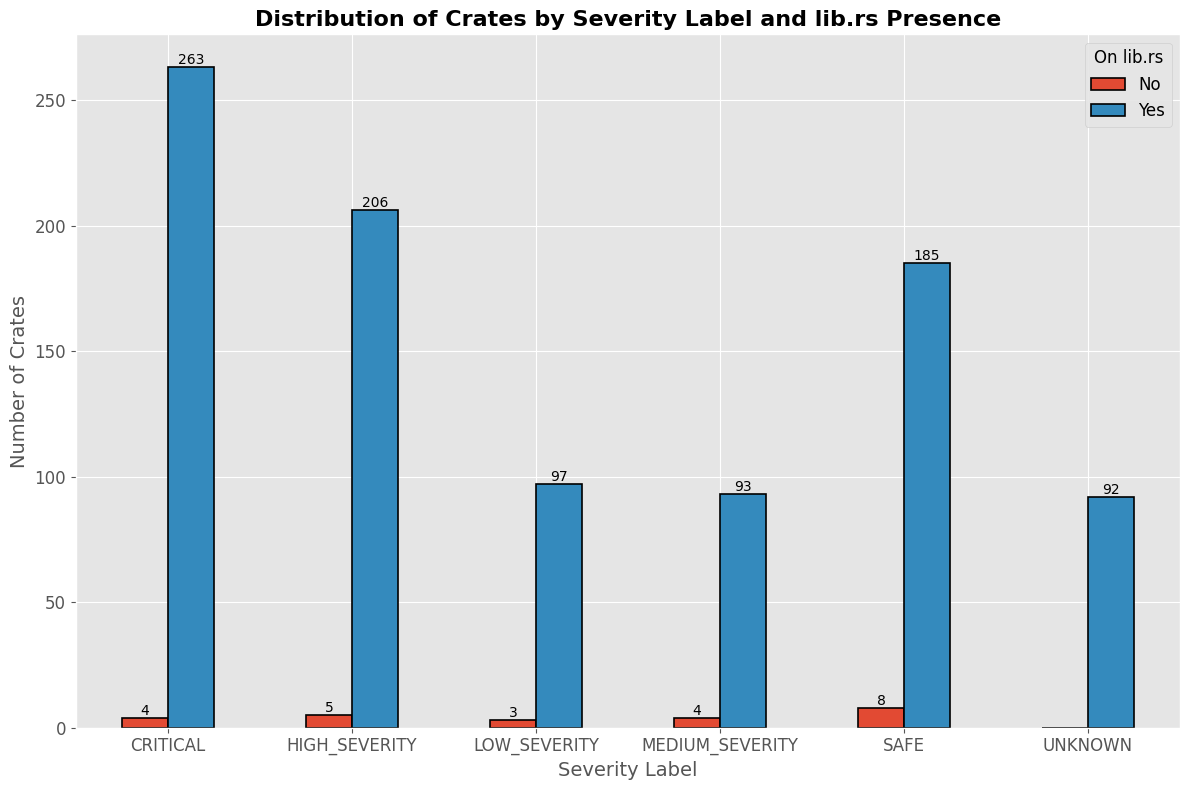

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Use a nice matplotlib style for improved aesthetics.
plt.style.use('ggplot')

# Load the CSV data.
df = pd.read_csv('librs_random.csv')

# Group data by severity label and lib.rs presence.
counts = df.groupby(['Severity Label', 'On lib.rs']).size().unstack(fill_value=0)

# Create a new figure and axis for the plot.
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a grouped bar chart.
counts.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1.2)

# Add a title and labels with larger, bold fonts.
ax.set_title("Distribution of Crates by Severity Label and lib.rs Presence", fontsize=16, fontweight='bold')
ax.set_xlabel("Severity Label", fontsize=14)
ax.set_ylabel("Number of Crates", fontsize=14)

# Format tick labels.
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

# Customize the legend.
legend = ax.legend(title="On lib.rs", fontsize=12, title_fontsize=12)
legend.get_frame().set_alpha(0.9)

# Annotate each bar with its height value.
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


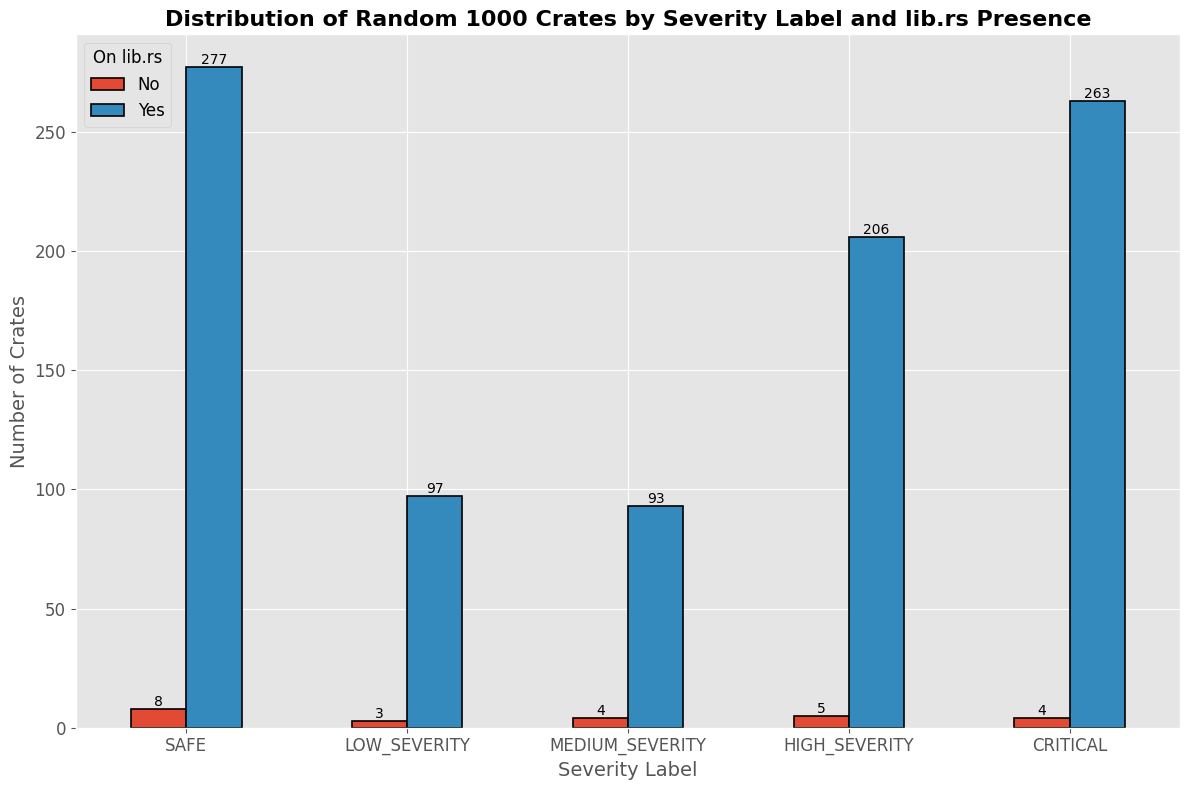

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Use a pleasing style.
plt.style.use('ggplot')

# Load the CSV data.
df = pd.read_csv('librs_random.csv')

# Replace 'UNKNOWN' with 'SAFE' to merge these categories.
df['Severity Label'] = df['Severity Label'].replace('UNKNOWN', 'SAFE')
# df = df[df['Severity Label'] != 'UNKNOWN']

desired_order = ['SAFE', 'LOW_SEVERITY', 'MEDIUM_SEVERITY', 'HIGH_SEVERITY', 'CRITICAL']

# Group data by severity label and lib.rs presence.
counts = df.groupby(['Severity Label', 'On lib.rs']).size().unstack(fill_value=0)

counts = counts.reindex(desired_order, fill_value=0)

# Create a new figure and axis.
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a grouped bar chart with edge colors for clarity.
counts.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1.2)

# Add a title and axis labels.
ax.set_title("Distribution of Random 1000 Crates by Severity Label and lib.rs Presence", fontsize=16, fontweight='bold')
ax.set_xlabel("Severity Label", fontsize=14)
ax.set_ylabel("Number of Crates", fontsize=14)

# Format tick labels.
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

# Customize the legend.
legend = ax.legend(title="On lib.rs", fontsize=12, title_fontsize=12)
legend.get_frame().set_alpha(0.9)

# Annotate each bar with its value.
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("/Users/hassnain/Desktop/rhs-paper/src/img/evaluation/rq3/random1000.pdf", bbox_inches='tight') 
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

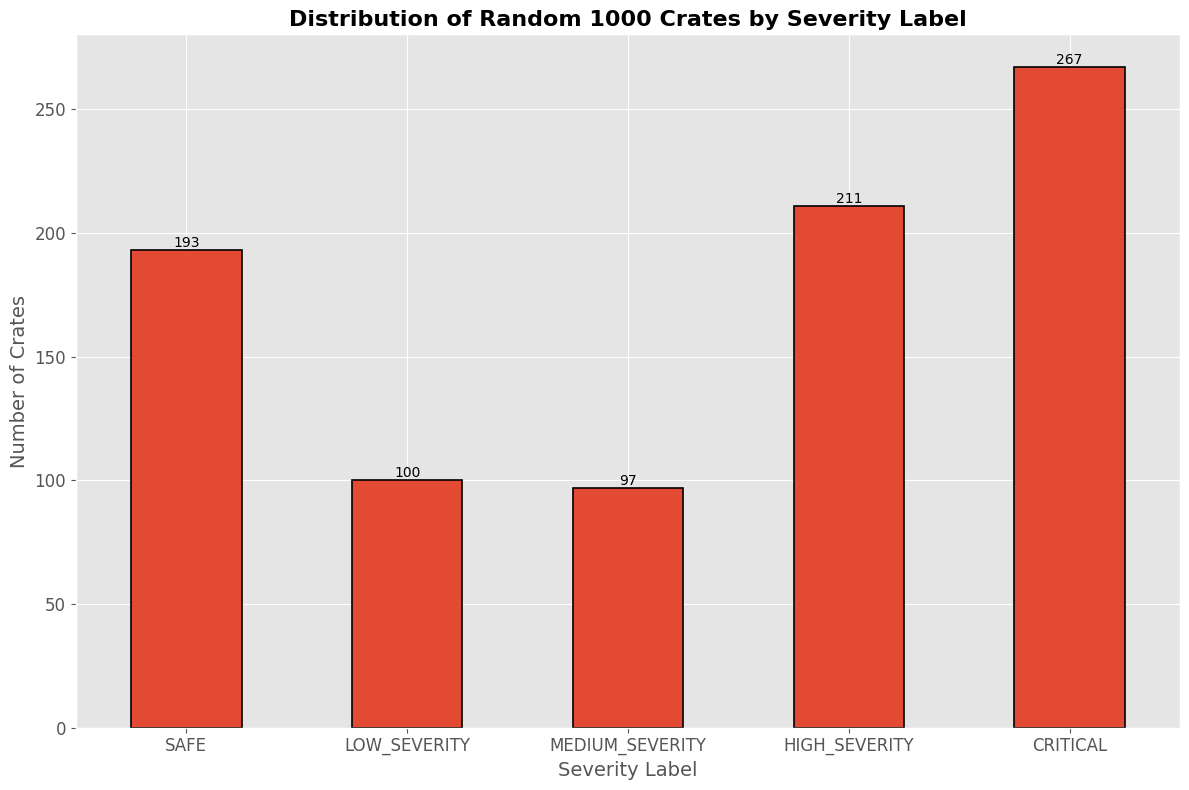

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Use a pleasing style.
plt.style.use('ggplot')

# Load the CSV data.
df = pd.read_csv('librs_random.csv')

# Replace 'UNKNOWN' with 'SAFE' to merge these categories.
# df['Severity Label'] = df['Severity Label'].replace('UNKNOWN', 'SAFE')
df = df[df['Severity Label'] != 'UNKNOWN']

desired_order = ['SAFE', 'LOW_SEVERITY', 'MEDIUM_SEVERITY', 'HIGH_SEVERITY', 'CRITICAL']

# Group data by severity label and lib.rs presence.
# counts = df.groupby(['Severity Label']).size().unstack(fill_value=0)
counts = df.value_counts('Severity Label')

counts = counts.reindex(desired_order, fill_value=0)

# Create a new figure and axis.
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a grouped bar chart with edge colors for clarity.
counts.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1.2)

# Add a title and axis labels.
ax.set_title("Distribution of Random 1000 Crates by Severity Label", fontsize=16, fontweight='bold')
ax.set_xlabel("Severity Label", fontsize=14)
ax.set_ylabel("Number of Crates", fontsize=14)

# Format tick labels.
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

# Customize the legend.
# legend = ax.legend(title="On lib.rs", fontsize=12, title_fontsize=12)
# legend.get_frame().set_alpha(0.9)

# Annotate each bar with its value.
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("/Users/hassnain/Desktop/rhs-paper/src/img/evaluation/rq3/random1000only.pdf", bbox_inches='tight') 
plt.show()


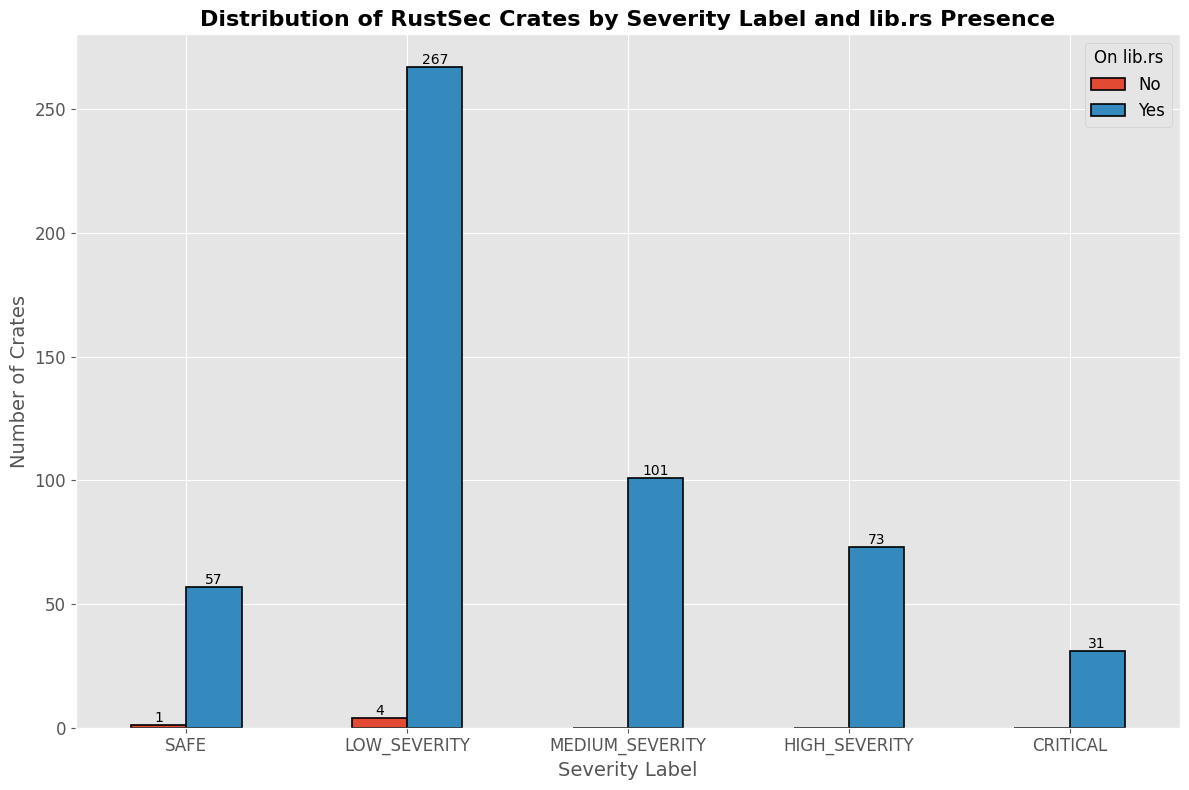

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Use a pleasing style.
plt.style.use('ggplot')

# Load the CSV data.
df = pd.read_csv('librs_rustsec.csv')

# Replace 'UNKNOWN' with 'SAFE' to merge these categories.
# df['Severity Label'] = df['Severity Label'].replace('UNKNOWN', 'SAFE')
df = df[df['Severity Label'] != 'UNKNOWN']

# Define the desired severity order.
desired_order = ['SAFE', 'LOW_SEVERITY', 'MEDIUM_SEVERITY', 'HIGH_SEVERITY', 'CRITICAL']

# Group data by severity label and lib.rs presence.
counts = df.groupby(['Severity Label', 'On lib.rs']).size().unstack(fill_value=0)

# Reindex the grouped data to enforce the x-axis order.
# fill_value=0 handles any missing categories that might not appear in the dataset.
counts = counts.reindex(desired_order, fill_value=0)

# Create a new figure and axis.
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a grouped bar chart with edge colors for clarity.
counts.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1.2)

# Add a title and axis labels.
ax.set_title("Distribution of RustSec Crates by Severity Label and lib.rs Presence", fontsize=16, fontweight='bold')
ax.set_xlabel("Severity Label", fontsize=14)
ax.set_ylabel("Number of Crates", fontsize=14)

# Format tick labels.
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

# Customize the legend.
legend = ax.legend(title="On lib.rs", fontsize=12, title_fontsize=12)
legend.get_frame().set_alpha(0.9)

# Annotate each bar with its value.
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("/Users/hassnain/Desktop/rhs-paper/src/img/evaluation/rq3/rustsec.pdf", bbox_inches='tight') 
plt.show()


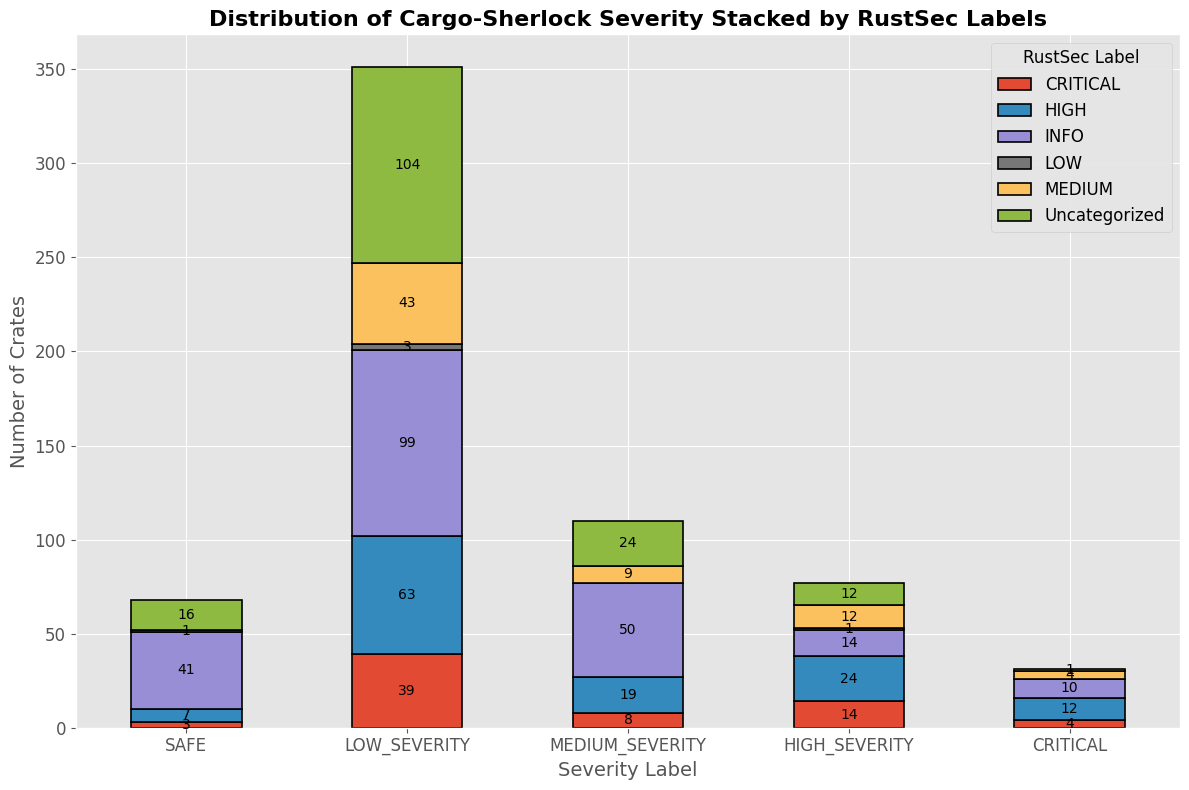

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read the first CSV (RustSec data).
df1 = pd.read_csv("rustsec_labels.csv")  
# Columns: crate_name, rustsec_label, advisory_type
# Example row:
# humantime,Uncategorized,INFOUnmaintained

# 2. Read the second CSV (lib.rs data).
df2 = pd.read_csv("librs_rustsec.csv")
# Columns: Crate Name, Severity Label, On lib.rs
# Example row:
# uci-0.2.3,HIGH_SEVERITY,Yes

# 3. Parse crate_name in df2 by stripping the trailing version (split on the last dash).
def parse_name(s: str) -> str:
    # If the crate name includes a dash, split on the last dash
    if "-" in s:
        # e.g. "arelith_combat_simulator-1.5.1" -> ("arelith_combat_simulator", "1.5.1")
        parts = s.rsplit("-", 1)
        return parts[0]
    else:
        # If no dash, assume the entire string is the crate name
        return s

df2["crate_name"] = df2["Crate Name"].apply(parse_name)

# 4. Merge both data sets on "crate_name".
#    - "how='left'" ensures we keep all rows from df2 (lib.rs data),
#      even if there's no match in df1 (RustSec).
df_merged = pd.merge(
    df2,
    df1,
    on="crate_name",
    how="left",
    suffixes=("_lib", "_rs")  # to avoid column name clashes
)

# 5. If not found in the first CSV, rustsec_label is NaN, so label it as "Not in RustSec".
df_merged["rustsec_label"] = df_merged["rustsec_label"].fillna("Not in RustSec")

# 6. Group by [Severity Label, rustsec_label] and pivot for stacked bar plotting.
counts = df_merged.groupby(["Severity Label", "rustsec_label"]).size().unstack(fill_value=0)

# 7. Reindex the rows (Severity Label) to enforce the desired order on the x-axis.
desired_order = ["SAFE", "LOW_SEVERITY", "MEDIUM_SEVERITY", "HIGH_SEVERITY", "CRITICAL"]
counts = counts.reindex(desired_order, fill_value=0)

# 8. Plot a stacked bar chart.
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', stacked=True, ax=ax, edgecolor='black', linewidth=1.2)

# 9. Add a title and axis labels.
ax.set_title("Distribution of Cargo-Sherlock Severity Stacked by RustSec Labels", fontsize=16, fontweight='bold')
ax.set_xlabel("Severity Label", fontsize=14)
ax.set_ylabel("Number of Crates", fontsize=14)

# Format tick labels.
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

# Customize the legend.
legend = ax.legend(title="RustSec Label", fontsize=12, title_fontsize=12)
legend.get_frame().set_alpha(0.9)

# Annotate each segment with its value.
for container in ax.containers:
    # Build a list of labels: use the integer if > 0, otherwise an empty string
    labels = [f"{int(bar.get_height())}" if bar.get_height() > 0 else "" for bar in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.savefig("/Users/hassnain/Desktop/rhs-paper/src/img/evaluation/rq3/rustsec-distribution.pdf", bbox_inches='tight') 
plt.show()


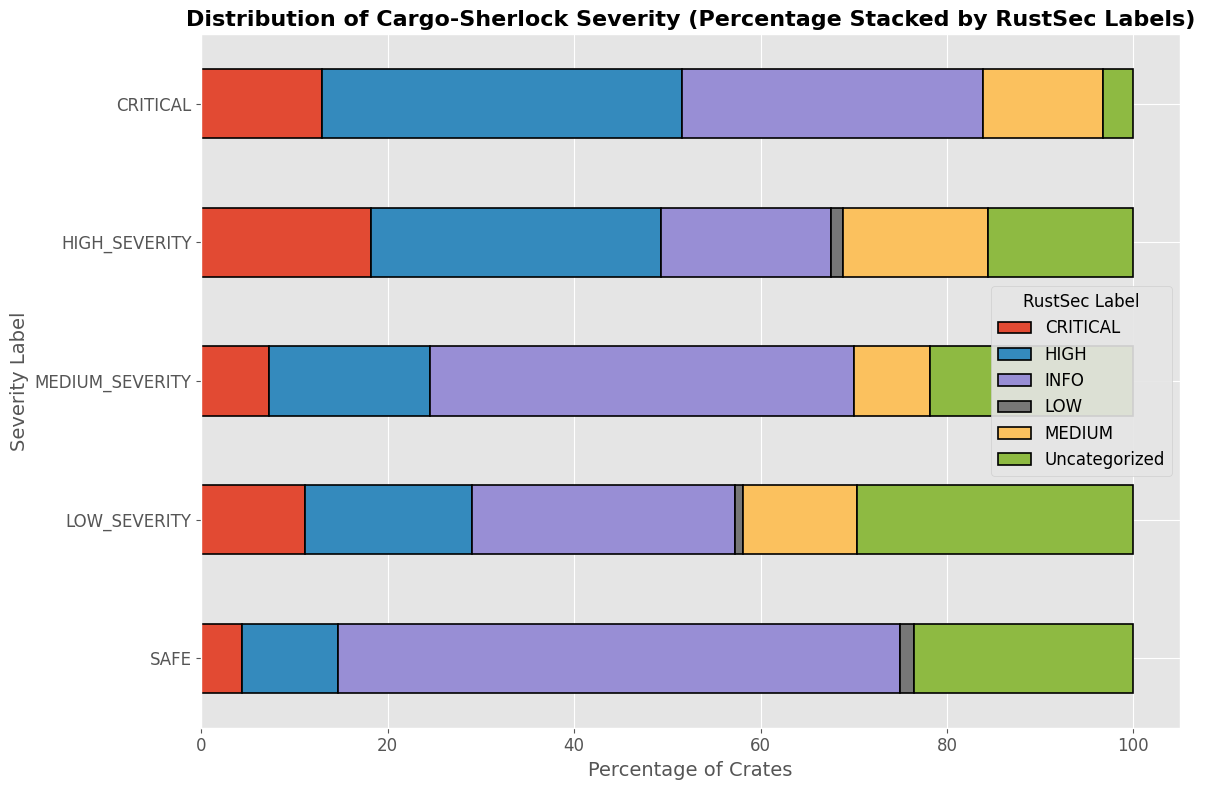

In [2]:
import matplotlib.pyplot as plt

# 1) Convert raw counts to percentages per row
counts_pct = counts.div(counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 8))
counts_pct.plot(kind='barh', stacked=True, ax=ax, edgecolor='black', linewidth=1.2)

ax.set_title("Distribution of Cargo-Sherlock Severity (Percentage Stacked by RustSec Labels)",
             fontsize=16, fontweight='bold')
ax.set_xlabel("Percentage of Crates", fontsize=14)
ax.set_ylabel("Severity Label", fontsize=14)

# Customize ticks, legend, etc. as needed
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
legend = ax.legend(title="RustSec Label", fontsize=12, title_fontsize=12)
legend.get_frame().set_alpha(0.9)

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'counts' is your DataFrame with severity labels as the index 
# and RustSec labels as the columns.
labels = counts.index           # e.g., [CRITICAL, HIGH_SEVERITY, ...]
rustsec_labels = counts.columns # e.g., [CRITICAL, HIGH, INFO, ...]
num_severities = len(labels)
num_rustsec = len(rustsec_labels)

# Positions on the y-axis for each severity
index = np.arange(num_severities)
bar_height = 0.8 / num_rustsec  # Total vertical space (0.8) divided among the RustSec labels

fig, ax = plt.subplots(figsize=(12, 8))

for i, rlabel in enumerate(rustsec_labels):
    # Plot each RustSec label as a separate bar within the group
    bars = ax.barh(index + i * bar_height, counts[rlabel], bar_height, label=rlabel, edgecolor='black')
    # Annotate each bar with its value at the end (right side)
    for bar in bars:
        width = bar.get_width()
        # Place text at the end of the bar (with a small horizontal offset)
        ax.text(width, bar.get_y() + bar.get_height() / 2,
                f'{int(width)}',
                va='center', ha='left', fontsize=10, fontweight='bold', color='black')

ax.set_yticks(index + (num_rustsec - 1) * bar_height / 2)
ax.set_yticklabels(labels, fontsize=12)
ax.set_xlabel("Number of Crates", fontsize=14)
ax.set_ylabel("Severity Label", fontsize=14)
ax.set_title("Distribution of Cargo-Sherlock Severity (Grouped by RustSec Labels) - Horizontal", 
             fontsize=16, fontweight='bold')

ax.tick_params(axis='x', labelsize=12)
legend = ax.legend(title="RustSec Label", fontsize=12, title_fontsize=12)
legend.get_frame().set_alpha(0.9)

plt.tight_layout()
plt.show()


NameError: name 'counts' is not defined

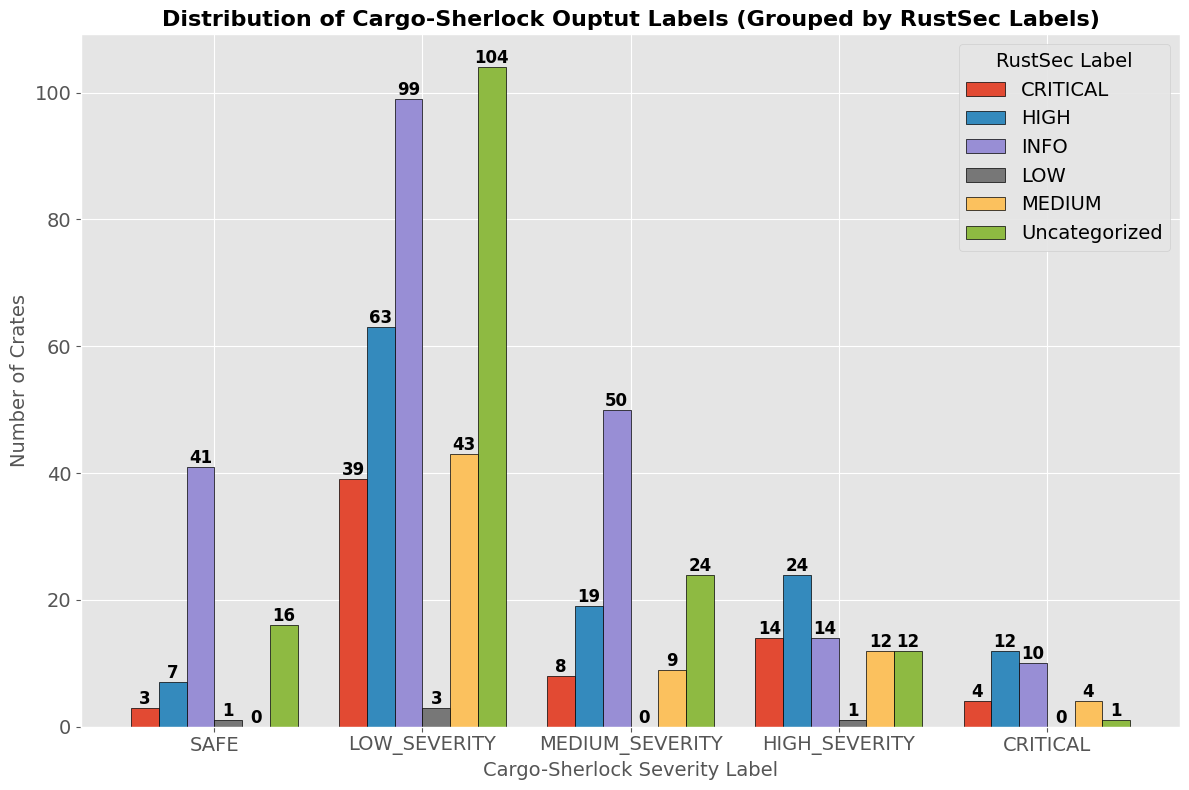

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'counts' is your DataFrame with severity labels as the index 
# and RustSec labels as the columns.
labels = counts.index           # e.g., [CRITICAL, HIGH_SEVERITY, ...]
rustsec_labels = counts.columns # e.g., [CRITICAL, HIGH, INFO, ...]
num_severities = len(labels)
num_rustsec = len(rustsec_labels)

# Positions on the x-axis for each severity
index = np.arange(num_severities)
bar_width = 0.8 / num_rustsec  # Total width (0.8) divided among the RustSec labels

fig, ax = plt.subplots(figsize=(12, 8))

for i, rlabel in enumerate(rustsec_labels):
    bars = ax.bar(index + i * bar_width, counts[rlabel], bar_width, label=rlabel, edgecolor='black')
    # Annotate each bar with its value on top
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

ax.set_xticks(index + (num_rustsec - 1) * bar_width / 2)
ax.set_xticklabels(labels, fontsize=14)
ax.set_xlabel("Cargo-Sherlock Severity Label", fontsize=14)
ax.set_ylabel("Number of Crates", fontsize=14)
ax.set_title("Distribution of Cargo-Sherlock Ouptut Labels (Grouped by RustSec Labels)", 
             fontsize=16, fontweight='bold')

ax.tick_params(axis='y', labelsize=14)
legend = ax.legend(title="RustSec Label", fontsize=14, title_fontsize=14)
legend.get_frame().set_alpha(0.9)

plt.tight_layout()
plt.savefig("/Users/hassnain/Desktop/rhs-paper/src/img/evaluation/rq3/rustsec-distribution.pdf", bbox_inches='tight') 
plt.show()


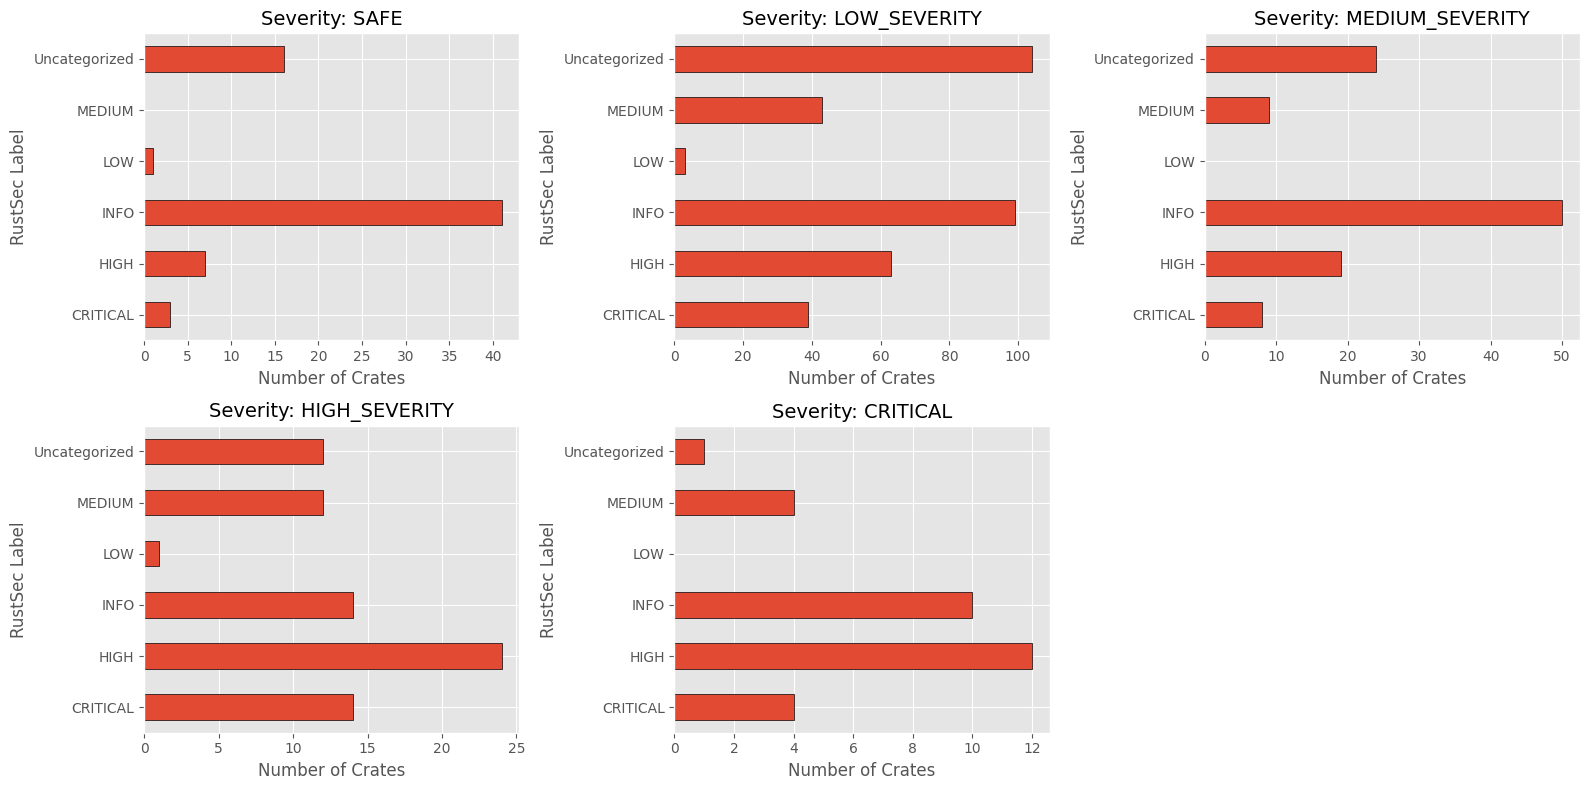

In [14]:
import math
import matplotlib.pyplot as plt

severities = counts.index
num_severities = len(severities)

# Arrange subplots in a grid (e.g., 2 or 3 columns wide)
cols = 3
rows = math.ceil(num_severities / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4), sharex=False, sharey=False)
axes = axes.flatten()  # Flatten in case rows*cols > num_severities

for i, severity_label in enumerate(severities):
    ax = axes[i]
    # Extract row for this severity
    row_data = counts.loc[severity_label]
    # Make a bar chart of RustSec labels for this severity
    row_data.plot(kind='barh', ax=ax, edgecolor='black')
    ax.set_title(f"Severity: {severity_label}", fontsize=14)
    ax.set_xlabel("Number of Crates", fontsize=12)
    ax.set_ylabel("RustSec Label", fontsize=12)

# Hide any unused subplots if severities < rows*cols
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


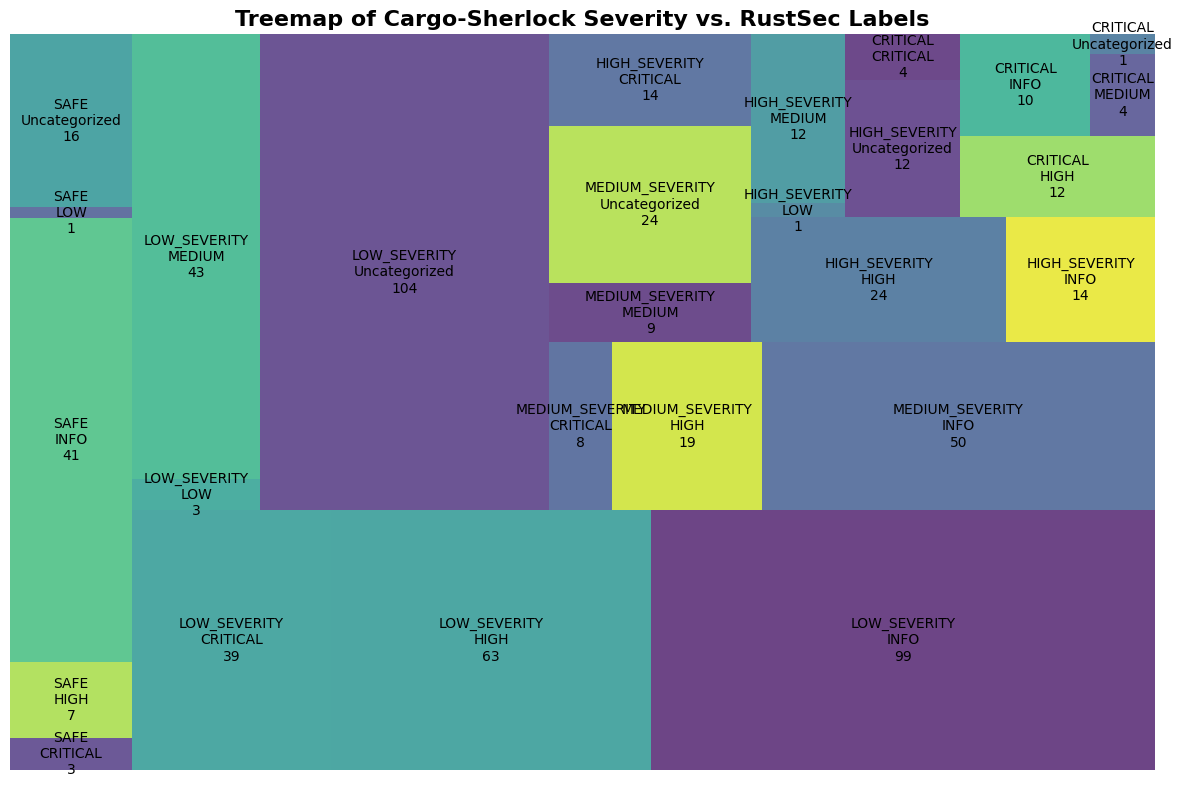

In [15]:
import squarify
import matplotlib.pyplot as plt

# Flatten your data into labels and sizes for the treemap
# Example: each (severity, rustsec_label) pair is an entry
labels = []
sizes = []
colors = []

for severity_label in counts.index:
    for rustsec_label in counts.columns:
        val = counts.loc[severity_label, rustsec_label]
        if val > 0:
            labels.append(f"{severity_label}\n{rustsec_label}\n{val}")
            sizes.append(val)
            # Optionally assign a color per severity or rustsec_label
            colors.append(None)  # let squarify pick

fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, ax=ax)
ax.set_title("Treemap of Cargo-Sherlock Severity vs. RustSec Labels",
             fontsize=16, fontweight='bold')
ax.axis('off')  # Hide the axis
plt.tight_layout()
plt.show()


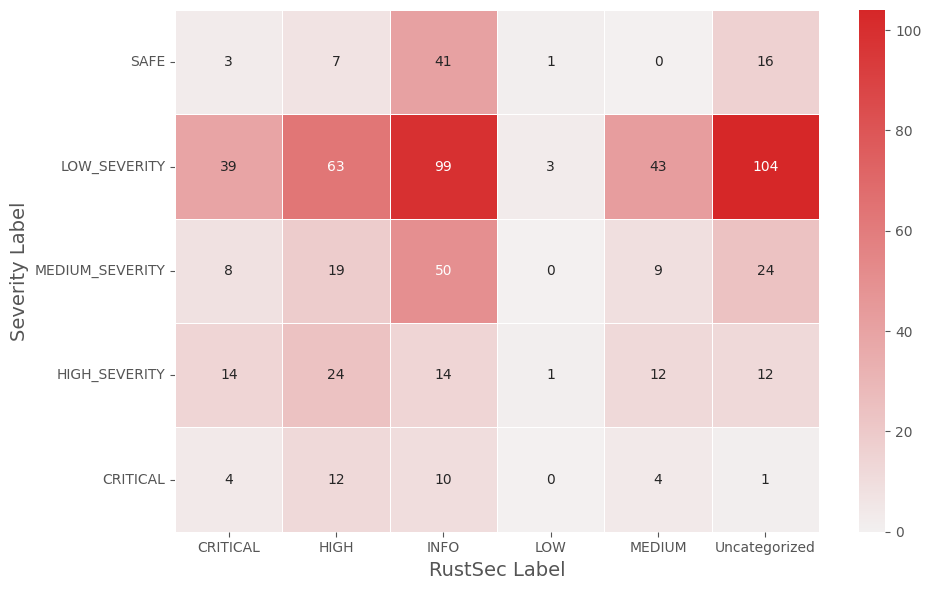

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick one color from your stacked bar palette
base_color = "#d62728"  # red (CRITICAL)

# Generate a light-to-dark palette of that color
cmap = sns.light_palette(base_color, as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(
    counts,
    cmap=cmap,
    annot=True,
    fmt='d',
    linewidths=0.5,
    linecolor='white',
    ax=ax
)

# ax.set_title("Heatmap with a Single-Hue Palette (Red)", fontsize=16, fontweight='bold')
ax.set_xlabel("RustSec Label", fontsize=14)
ax.set_ylabel("Severity Label", fontsize=14)

plt.tight_layout()
plt.show()


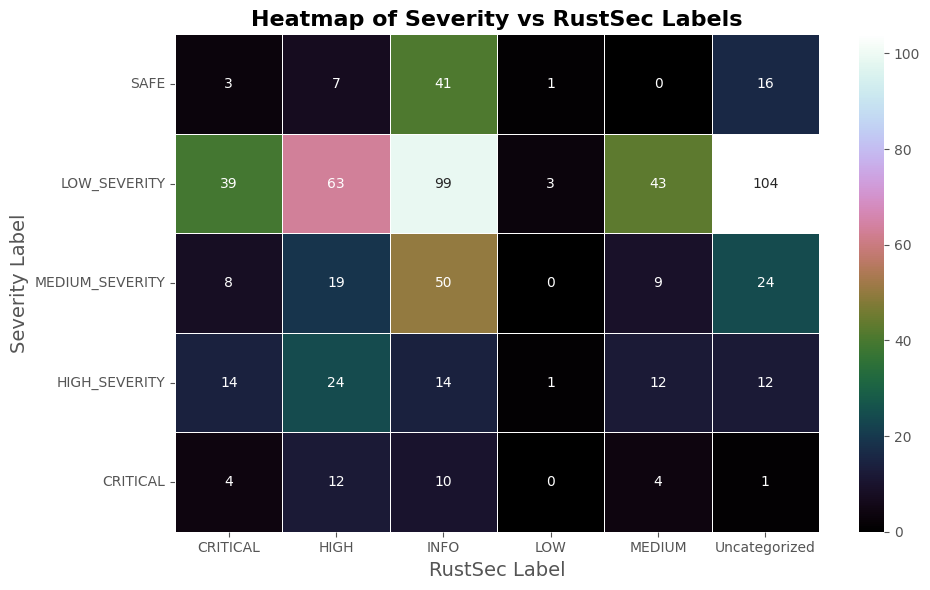

In [17]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(counts, annot=True, fmt='d', cmap='cubehelix', linewidths=.5, ax=ax)

ax.set_title("Heatmap of Severity vs RustSec Labels", fontsize=16, fontweight='bold')
ax.set_xlabel("RustSec Label", fontsize=14)
ax.set_ylabel("Severity Label", fontsize=14)

plt.tight_layout()
plt.show()


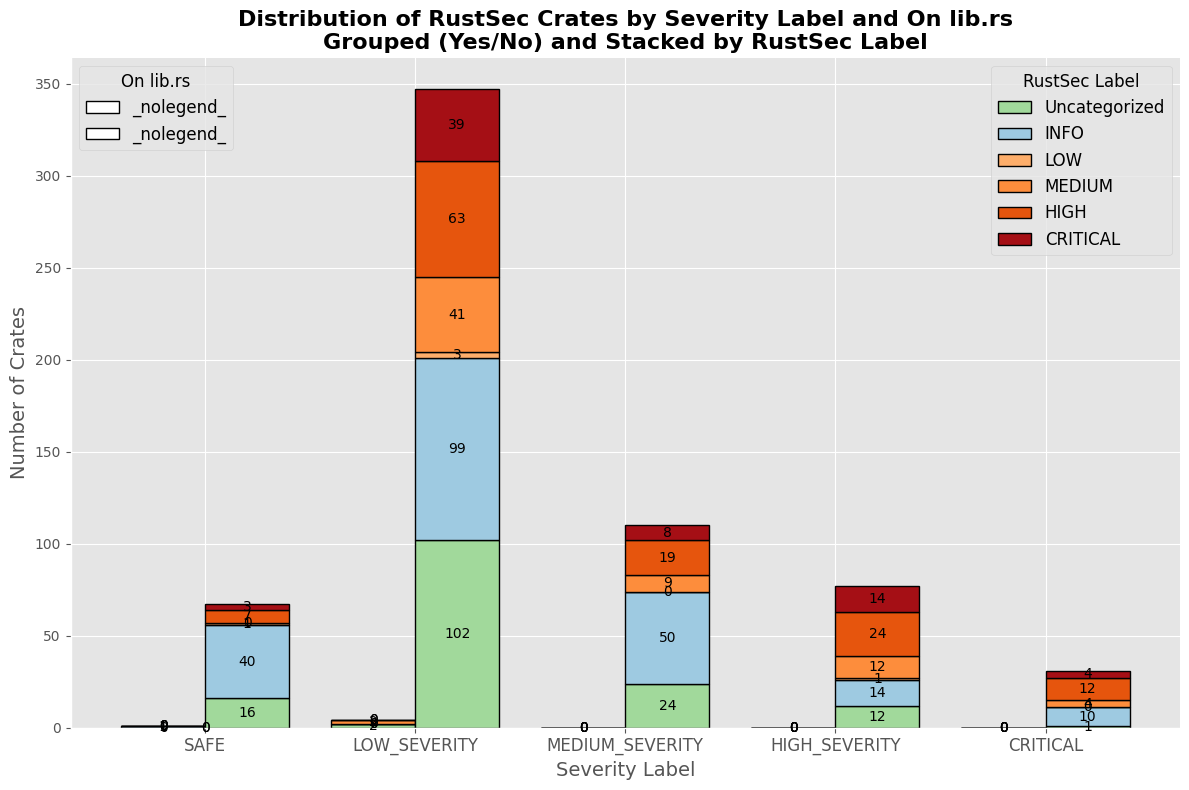

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ─────────────────────────────────────────────────────────────────────────────
# 1. Read your CSV files
# ─────────────────────────────────────────────────────────────────────────────
df1 = pd.read_csv("rustsec_labels.csv")
# columns: [crate_name, rustsec_label, advisory_type, ...]

df2 = pd.read_csv("librs_rustsec.csv")
# columns: [Crate Name, Severity Label, On lib.rs, ...]

# ─────────────────────────────────────────────────────────────────────────────
# 2. Parse crate names in df2 by stripping trailing version (split on last dash)
# ─────────────────────────────────────────────────────────────────────────────
def parse_name(s: str) -> str:
    # Example: "arelith_combat_simulator-1.5.1" -> "arelith_combat_simulator"
    if "-" in s:
        parts = s.rsplit("-", 1)
        return parts[0]
    return s

df2["crate_name"] = df2["Crate Name"].apply(parse_name)

# ─────────────────────────────────────────────────────────────────────────────
# 3. Merge on crate_name; label missing RustSec entries as "Not in RustSec"
# ─────────────────────────────────────────────────────────────────────────────
df_merged = pd.merge(
    df2,
    df1,
    on="crate_name",
    how="left",
    suffixes=("_lib", "_rs")
)
df_merged["rustsec_label"] = df_merged["rustsec_label"].fillna("Not in RustSec")

# ─────────────────────────────────────────────────────────────────────────────
# 4. Group by (Severity Label, On lib.rs, rustsec_label), then count
# ─────────────────────────────────────────────────────────────────────────────
grouped = df_merged.groupby(
    ["Severity Label", "On lib.rs", "rustsec_label"]
).size().reset_index(name="count")

# Desired order on x-axis
severity_order = ["SAFE", "LOW_SEVERITY", "MEDIUM_SEVERITY", "HIGH_SEVERITY", "CRITICAL"]
on_lib_values = ["No", "Yes"]  # We'll create 2 bars per severity label
# All distinct RustSec labels in the data
rustsec_labels = grouped["rustsec_label"].unique().tolist()

# Optional: If you want a specific order for rustsec_labels, define it here:
preferred_label_order = [
    "Not in RustSec",
    "Uncategorized",
    "INFO",
    "LOW",
    "MEDIUM",
    "HIGH",
    "CRITICAL"
]
# Filter out any that are not in the data and keep only those that appear
rustsec_labels = [lbl for lbl in preferred_label_order if lbl in rustsec_labels]

# ─────────────────────────────────────────────────────────────────────────────
# 5. Manual plotting of “grouped + stacked” bars
# ─────────────────────────────────────────────────────────────────────────────
plt.style.use("ggplot")  # or any built-in style except those not installed
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(severity_order))  # X positions for each severity label
bar_width = 0.4                     # Width of each bar
offset_factor = [-0.5, 0.5]         # So that bars (No, Yes) center around each x

# A color map for the RustSec labels
color_map = {
    "Not in RustSec": "#bdbdbd",
    "Uncategorized":  "#a1d99b",
    "INFO":           "#9ecae1",
    "LOW":            "#fdae6b",
    "MEDIUM":         "#fd8d3c",
    "HIGH":           "#e6550d",
    "CRITICAL":       "#a50f15"
}

# We’ll keep track of legend handles for two separate legends:
yesno_handles = []        # For the "On lib.rs" legend
rustsec_handles = {}      # For each rustsec_label color

for i, on_lib in enumerate(on_lib_values):
    # Shift bar positions so that "No" and "Yes" bars sit side-by-side
    x_positions = x + offset_factor[i] * bar_width
    
    # Create a dummy bar just to show in the "On lib.rs" legend
    # We'll do it once for each on_lib value
    yesno_bar = ax.bar(0, 0, color="white", edgecolor="black", linewidth=1.0,
                       label=on_lib)
    yesno_handles.append(yesno_bar[0])
    
    # We'll keep track of the cumulative height at each x-position for stacking
    bottom_heights = np.zeros(len(severity_order))
    
    # Plot each rustsec_label as a stacked segment
    for rust_label in rustsec_labels:
        # Gather the counts for each severity label
        bar_heights = []
        for sev_i, sev_label in enumerate(severity_order):
            row = grouped[
                (grouped["Severity Label"] == sev_label) &
                (grouped["On lib.rs"] == on_lib) &
                (grouped["rustsec_label"] == rust_label)
            ]
            if not row.empty:
                bar_heights.append(row["count"].values[0])
            else:
                bar_heights.append(0)
        
        # Draw this segment
        color = color_map.get(rust_label, "#888888")
        bars = ax.bar(
            x_positions,
            bar_heights,
            bar_width,
            bottom=bottom_heights,
            color=color,
            edgecolor="black",
            linewidth=1.0
        )
        
        # Update bottom heights for next segment
        bottom_heights += bar_heights
        
        # Add a label handle for the rustsec_label legend if not added yet
        if rust_label not in rustsec_handles:
            bars.set_label(rust_label)
            rustsec_handles[rust_label] = bars

# ─────────────────────────────────────────────────────────────────────────────
# 6. Aesthetics: Axis labels, title, ticks, legends
# ─────────────────────────────────────────────────────────────────────────────
ax.set_xticks(x)
ax.set_xticklabels(severity_order, fontsize=12)
ax.set_xlabel("Severity Label", fontsize=14)
ax.set_ylabel("Number of Crates", fontsize=14)
ax.set_title("Distribution of RustSec Crates by Severity Label and On lib.rs\nGrouped (Yes/No) and Stacked by RustSec Label",
             fontsize=16, fontweight="bold")

# Remove top/right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Build two legends:
# 1) On lib.rs
legend_onlib = ax.legend(handles=yesno_handles, title="On lib.rs", fontsize=12, title_fontsize=12, loc="upper left")
ax.add_artist(legend_onlib)

# 2) RustSec Label
rustsec_handles_list = list(rustsec_handles.values())
legend_rustsec = ax.legend(handles=rustsec_handles_list, title="RustSec Label",
                           fontsize=12, title_fontsize=12, loc="upper right")

# Annotate each stacked segment with its value
for bars in ax.containers:
    ax.bar_label(bars, label_type="center", fmt="%d", fontsize=10)

plt.tight_layout()
plt.show()


In [19]:
!pip install statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


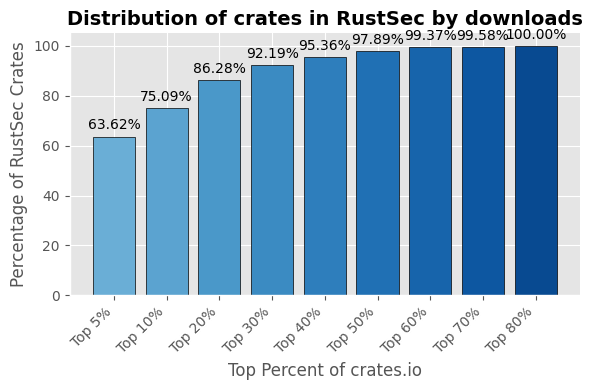

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data from the table
data = {
    "Top Percent of crates.io": [
        "Top 5%", "Top 10%", "Top 20%", "Top 30%", "Top 40%", 
        "Top 50%", "Top 60%", "Top 70%", "Top 80%"
    ],
    "Percentage of RustSec Crates": [
        63.62, 75.09, 86.28, 92.19, 95.36, 97.89, 99.37, 99.58, 100.00
    ]
}

df = pd.DataFrame(data)

# Use a pleasant style.
plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(6, 4))

# Create a numeric index for bars
x = np.arange(len(df))

# Generate a gradient of blues for the bars
bar_colors = plt.cm.Blues(np.linspace(0.5, 0.9, len(df)))

# Plot a bar chart
bars = ax.bar(x, df["Percentage of RustSec Crates"], 
              color=bar_colors, edgecolor="black")

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(df["Top Percent of crates.io"], rotation=45, ha="right")

# Axis labels and title
ax.set_xlabel("Top Percent of crates.io", fontsize=12)
ax.set_ylabel("Percentage of RustSec Crates", fontsize=12)
ax.set_title("Distribution of crates in RustSec by downloads", 
             fontsize=14, fontweight="bold")

# Remove top/right spines for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Annotate each bar with its value, skipping 0 if any
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f"{height:.2f}%",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=10)

plt.tight_layout()
# plt.savefig("rustsec-percentiles.pdf", bbox_inches="tight")
plt.savefig("/Users/hassnain/Desktop/rhs-paper/src/img/evaluation/rq3/rustsec-percentiles.pdf", bbox_inches="tight")
plt.show()


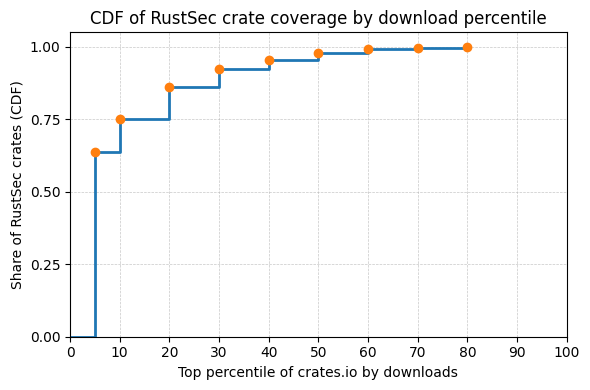

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    "top_percent": [5, 10, 20, 30, 40, 50, 60, 70, 80],
    "pct_rustsec": [63.62, 75.09, 86.28, 92.19, 95.36, 97.89, 99.37, 99.58, 100.00],
}
df = pd.DataFrame(data)

# convert into %age for cdf
df["prop_rustsec"] = df["pct_rustsec"] / 100.0

# budiling array for cdf
x = np.array([0] + df["top_percent"].tolist())
y = np.array([0.0] + df["prop_rustsec"].tolist())

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.step(x, y, where="post", linewidth=2)
ax.plot(df["top_percent"], df["prop_rustsec"], marker="o", linestyle="None")  # show observed points

# Labels, ticks, limits
ax.set_xlabel("Top percentile of crates.io by downloads")
ax.set_ylabel("Share of RustSec crates (CDF)")
ax.set_title("CDF of RustSec crate coverage by download percentile")
ax.set_xlim(0, 100)
ax.set_ylim(0, 1.05)
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])

# using light grid for readability
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()

# plt.savefig("rustsec_cdf.pdf", bbox_inches="tight")
plt.savefig("/Users/hassnain/Desktop/rhs-paper/src/img/evaluation/rq3/rustsec_cdf.pdf", bbox_inches="tight", dpi=300)
plt.show()


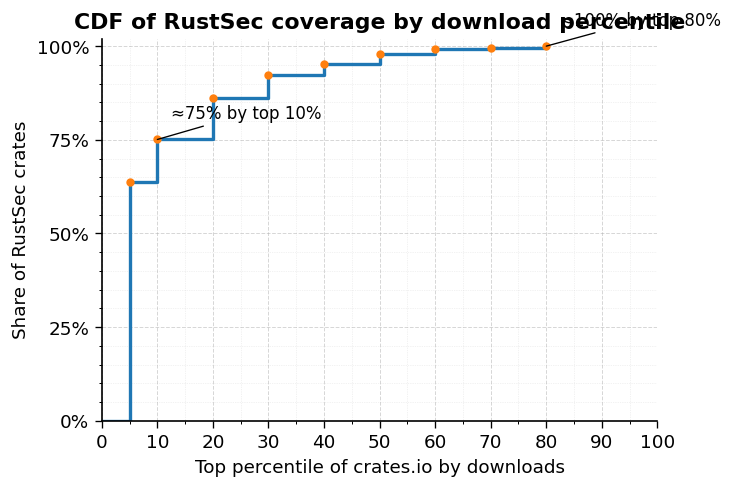

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, MultipleLocator
import pandas as pd
import numpy as np

#Chatgpt attempt for a prettier version

data = {
    "top_percent": [5, 10, 20, 30, 40, 50, 60, 70, 80],
    "pct_rustsec": [63.62, 75.09, 86.28, 92.19, 95.36, 97.89, 99.37, 99.58, 100.00],
}
df = pd.DataFrame(data)
df["prop_rustsec"] = df["pct_rustsec"] / 100.0

# Aesthetic tuning (publication-friendly, minimal)
mpl.rcParams.update({
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "font.size": 11,
    "axes.titleweight": "bold",
    "axes.labelweight": "regular",
    "axes.linewidth": 1.0,
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,
    "legend.frameon": False,
})

# Build step-wise CDF
x = np.array([0] + df["top_percent"].tolist())
y = np.array([0.0] + df["prop_rustsec"].tolist())

fig, ax = plt.subplots(figsize=(6.2, 4.2))

# Step line + markers at observed points
ax.step(x, y, where="post", linewidth=2)
ax.plot(df["top_percent"], df["prop_rustsec"], marker="o", linestyle="None", ms=4)

# Labels & title
ax.set_xlabel("Top percentile of crates.io by downloads")
ax.set_ylabel("Share of RustSec crates")
ax.set_title("CDF of RustSec coverage by download percentile")

# Ticks, limits, formatting
ax.set_xlim(0, 100)
ax.set_ylim(0, 1.02)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Subtle grid & clean spines
ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.5)
ax.grid(True, which="minor", linestyle=":", linewidth=0.4, alpha=0.35)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Optional lightweight callouts (delete if not wanted)
def annotate_point(px, py, label):
    ax.annotate(
        label, xy=(px, py), xytext=(8, 10), textcoords="offset points",
        ha="left", va="bottom", fontsize=10,
        arrowprops=dict(arrowstyle="-", linewidth=0.8, shrinkA=0, shrinkB=0)
    )
annotate_point(10, df.loc[df["top_percent"] == 10, "prop_rustsec"].iloc[0], "≈75% by top 10%")
annotate_point(80, df.loc[df["top_percent"] == 80, "prop_rustsec"].iloc[0], "≈100% by top 80%")

plt.tight_layout()
plt.savefig("/Users/hassnain/Desktop/rhs-paper/src/img/evaluation/rq3/rustsec_cd2.pdf", bbox_inches="tight", dpi=300)
plt.show()


In [3]:
import pandas as pd 
df = pd.read_csv("librs_random.csv")
df.head()

failed = df[df["Severity Label"] == "UNKNOWN"]
print(f"Number of crates with UNKNOWN severity: {len(failed)}")
failed.head()

Number of crates with UNKNOWN severity: 91


,Crate Name,Severity Label,On lib.rs
20,solana-test-utils-0.1.19,UNKNOWN,Yes
34,sc-transaction-pool-38.1.0,UNKNOWN,Yes
42,solana-system-program-2.2.3,UNKNOWN,Yes
54,pkg-utils-0.1.0,UNKNOWN,Yes
62,gweiyser-0.1.4,UNKNOWN,Yes


In [4]:
import tqdm 
import subprocess,shlex


for crate in tqdm.tqdm(failed["Crate Name"]):
    name, version = crate.rsplit("-", 1)
    print("working on:", crate)
    cmd = f"python3 sherlock.py trust {name} {version} -o ./evaluation/rq3/random1000/{crate}"
    try:
        # 600 seconds = 10 minutes
        subprocess.run(shlex.split(cmd), timeout=600, check=True)
    except subprocess.TimeoutExpired:
        print(f"[TIMEOUT] {crate} exceeded 10 minutes; skipping.")
    except subprocess.CalledProcessError as e:
        print(f"[ERROR] {crate} failed with exit code {e.returncode}.")
    
    


  0%|          | 0/91 [00:00<?, ?it/s]

working on: solana-test-utils-0.1.19
Loading Results for solana-test-utils-0.1.19 from cache...
Loading Results for anchor-lang-0.31.0 from cache...
Loading Results for anchor-attribute-access-control-0.31.0 from cache...
Loading Results for anchor-syn-0.31.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for bs58-0.5.1 from cache...
Loading Results for heck-0.5.0 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.219 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for serde_json-1.0.140 from cache...
Loading Results for itoa-1.0.15 from cache...
Loading Results for memchr-2.7.4 from cache...
Loading Results for ryu-1.0.20 from cache...
Loading Results for sha2-0.10.8 from cache...
Loading Results for cfg-if-1.0.0 from cache...


  1%|          | 1/91 [10:00<15:00:01, 600.02s/it]

[TIMEOUT] solana-test-utils-0.1.19 exceeded 10 minutes; skipping.
working on: sc-transaction-pool-38.1.0
Loading Results for sc-transaction-pool-38.1.0 from cache...
Loading Results for async-trait-0.1.88 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for futures-0.3.31 from cache...
Loading Results for futures-channel-0.3.31 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loading Results for futures-io-0.3.31 from cache...
Loading Results for futures-sink-0.3.31 from cache...
Loading Results for futures-task-0.3.31 from cache...
Loading Results for futures-util-0.3.31 from cache...
Loading Results for pin-project-lite-0.2.16 from cache...
Loading Results for pin-utils-0.1.0 from cache...
Loading Results for futures-timer-3.0.3 from cache...
Loading Results for indexmap-2.8.0 from cach

  2%|▏         | 2/91 [20:00<14:50:03, 600.04s/it]

[TIMEOUT] sc-transaction-pool-38.1.0 exceeded 10 minutes; skipping.
working on: solana-system-program-2.2.3
Loading Results for solana-system-program-2.2.3 from cache...
Loading Results for bincode-2.0.1 from cache...
Loading Results for unty-0.0.4 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.219 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for solana-account-2.2.1 from cache...
Loading Results for solana-account-info-2.2.1 from cache...
Loading Results for solana-program-error-2.2.1 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for solana-decode-error-2.2.1 from cache...
Loading Results for solana-instruction-2.2.1 from cache...
Loading Results for getrandom-0.3.2 from 

  3%|▎         | 3/91 [28:21<13:34:04, 555.05s/it]

working on: pkg-utils-0.1.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for pkg-utils-0.1.0 from cache...
Loading Results for display_derive-0.0.0 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for synstructure-0.13.1 from cache...
Loading Results for failure-0.1.8 from cache...
Loading Results for flate2-1.1.0 from cache...
Loading Results for crc32fast-1.4.2 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for miniz_oxide-0.8.5 from cache...
Loading Results for adler2-2.0.0 from cache...
Loading Results for itertools-0.14.0 from cache...
Loading Results for either-1.15.0 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for rayon-1.10.0 from cache...
Loading Results for rayon-core-1.12.1 from cache...
Loading Results for crossbeam-deque-0.8.6 from cache...
Loading Results for crossbeam-epoch-0.9.18 from ca

  5%|▌         | 5/91 [38:22<10:18:18, 431.38s/it]

[TIMEOUT] gweiyser-0.1.4 exceeded 10 minutes; skipping.
working on: bellhop-auth-header-0.2.1


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for bellhop-auth-header-0.2.1 from cache...
Loading Results for bellhop-0.2.1 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for diesel-2.2.8 from cache...
Loading Results for diesel_derives-2.2.4 from cache...
Loading Results for diesel_table_macro_syntax-0.2.0 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for dsl_auto_type-0.1.3 from cache...
Loading Results for darling-0.20.10 from cache...
Loading Results for darling_core-0.20.10 from cache...
Loading Results for fnv-1.0.7 from cache...
Loading Results for ident_case-1.0.1 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for darling_macro-0.20.10 from cache...
Loading Results for either-1.15.0 from cache...
Loading Results for heck-0.5.0 from cache...
Loading Results for 

  8%|▊         | 7/91 [46:22<8:07:56, 348.52s/it]

working on: mdbook-tera-backend-0.0.1
Loading Results for mdbook-tera-backend-0.0.1 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for mdbook-0.4.47 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for clap-4.5.32 from cache...
Loading Results for clap_builder-4.5.32 from cache...
Loading Results for anstyle-1.0.10 from cache...
Loading Results for clap_lex-0.7.4 from cache...
Loading Results for clap_complete-4.5.47 from cache...
Loading Results for env_logger-0.11.7 from cache...
Loading Results for env_filter-0.1.3 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for handlebars-6.3.2 from cache...
Loading Results for derive_builder-0.20.2 from cache...
Loading Results for derive_builder_macro-0.20.2 from cache...
Loading Results for derive_builder_core-0.20.2 from cache...
Loading Results for darling-0.20.10 from cache...
Loading Results for darli

  9%|▉         | 8/91 [48:06<6:14:10, 270.49s/it]

working on: photon-indexer-0.50.0
Loading Results for photon-indexer-0.50.0 from cache...
Loading Results for anchor-lang-0.31.0 from cache...
Loading Results for anchor-attribute-access-control-0.31.0 from cache...
Loading Results for anchor-syn-0.31.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for bs58-0.5.1 from cache...
Loading Results for heck-0.5.0 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.219 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for serde_json-1.0.140 from cache...
Loading Results for itoa-1.0.15 from cache...
Loading Results for memchr-2.7.4 from cache...
Loading Results for ryu-1.0.20 from cache...
Loading Results for sha2-0.10.8 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loadin

 10%|▉         | 9/91 [58:06<8:30:27, 373.51s/it]

[TIMEOUT] photon-indexer-0.50.0 exceeded 10 minutes; skipping.
working on: neo3-0.1.9
Loading Results for neo3-0.1.9 from cache...
Loading Results for aes-0.8.4 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for cipher-0.4.4 from cache...
Loading Results for crypto-common-0.1.6 from cache...
Loading Results for generic-array-1.2.0 from cache...
Loading Results for typenum-1.18.0 from cache...
Loading Results for inout-0.1.4 from cache...
Loading Results for cpufeatures-0.2.17 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for async-stream-0.3.6 from cache...
Loading Results for async-stream-impl-0.3.6 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loading Results for pin-project-lite-0.2.16 from cache...
Load

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

[ERROR] neo3-0.1.9 failed with exit code 1.
working on: iroh-docs-0.34.0
Loading Results for iroh-docs-0.34.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for async-channel-2.3.1 from cache...
Loading Results for concurrent-queue-2.5.0 from cache...
Loading Results for crossbeam-utils-0.8.21 from cache...
Loading Results for event-listener-strategy-0.5.3 from cache...
Loading Results for event-listener-5.4.0 from cache...
Loading Results for pin-project-lite-0.2.16 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loading Results for bytes-1.10.1 from cache...
Loading Results for derive_more-2.0.1 from cache...
Loading Results for derive_more-impl-2.0.1 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for ed25519-dalek-2.1.1 from cache...
Loading Results fo

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

[ERROR] iroh-docs-0.34.0 failed with exit code 1.
working on: emu_core-0.1.1


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for emu_core-0.1.1 from cache...
Loading Results for derive_more-2.0.1 from cache...
Loading Results for derive_more-impl-2.0.1 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for futures-0.3.31 from cache...
Loading Results for futures-channel-0.3.31 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loading Results for futures-io-0.3.31 from cache...
Loading Results for futures-sink-0.3.31 from cache...
Loading Results for futures-task-0.3.31 from cache...
Loading Results for futures-util-0.3.31 from cache...
Loading Results for pin-project-lite-0.2.16 from cache...
Loading Results for pin-utils-0.1.0 from cache...
Loading Results for lazy_static-1.5.0 from cache...
Loading Results for wgpu-24.0.3 from cache...
Loading Results for arrayvec-0.7.6 from cache...
Loading Resu

 14%|█▍        | 13/91 [59:14<2:19:29, 107.30s/it]

working on: sc-sync-state-rpc-0.48.0
Loading Results for sc-sync-state-rpc-0.48.0 from cache...
Loading Results for jsonrpsee-0.24.9 from cache...
Loading Results for parity-scale-codec-3.7.4 from cache...
Loading Results for arrayvec-0.7.6 from cache...
Loading Results for byte-slice-cast-1.2.3 from cache...
Loading Results for const_format-0.2.34 from cache...
Loading Results for const_format_proc_macros-0.2.34 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for unicode-xid-0.2.6 from cache...
Loading Results for impl-trait-for-tuples-0.2.3 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for sc-chain-spec-41.0.0 from cache...
Loading Results for array-bytes-9.1.2 from cache...
Loading Results for smallvec-1.14.0 from cache...
Loading Results for docify-0.4.1 from cache...
Loading Results for docify_macros-0.4.1 from cache

 15%|█▌        | 14/91 [1:09:14<5:28:41, 256.13s/it]

[TIMEOUT] sc-sync-state-rpc-0.48.0 exceeded 10 minutes; skipping.
working on: mdbook-tocjs-0.1.4
Loading Results for mdbook-tocjs-0.1.4 from cache...
Loading Results for clap-4.5.32 from cache...
Loading Results for clap_builder-4.5.32 from cache...
Loading Results for anstyle-1.0.10 from cache...
Loading Results for clap_lex-0.7.4 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for mdbook-0.4.47 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for clap_complete-4.5.47 from cache...
Loading Results for env_logger-0.11.7 from cache...
Loading Results for env_filter-0.1.3 from cache...
Loading Results for handlebars-6.3.2 from cache...
Loading Results for derive_builder-0.20.2 from cache...
Loading Results for derive_builder_macro-0.20.2 from cache...
Loading Results for derive_builder_core-0.20.2 from cache...
Loading Results for dar

 16%|█▋        | 15/91 [1:10:20<4:11:39, 198.68s/it]

working on: bellhop-demo-0.2.1


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for bellhop-demo-0.2.1 from cache...
Loading Results for bellhop-0.2.1 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for diesel-2.2.8 from cache...
Loading Results for diesel_derives-2.2.4 from cache...
Loading Results for diesel_table_macro_syntax-0.2.0 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for dsl_auto_type-0.1.3 from cache...
Loading Results for darling-0.20.10 from cache...
Loading Results for darling_core-0.20.10 from cache...
Loading Results for fnv-1.0.7 from cache...
Loading Results for ident_case-1.0.1 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for darling_macro-0.20.10 from cache...
Loading Results for either-1.15.0 from cache...
Loading Results for heck-0.5.0 from cache...
Loading Results for error-c

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for arecibo-0.1.1 from cache...
Loading Results for abomonation-0.7.3 from cache...
Loading Results for abomonation_derive_ng-0.1.0 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for bellpepper-0.4.1 from cache...
Loading Results for bellpepper-core-0.4.0 from cache...
Loading Results for blake2s_simd-1.0.3 from cache...
Loading Results for arrayref-0.3.9 from cache...
Loading Results for arrayvec-0.7.6 from cache...
Loading Results for constant_time_eq-0.4.2 from cache...
Loading Results for byteorder-1.5.0 from cache...
Loading Results for ff-0.13.1 from cache...
Loading Results for rand_core-0.9.3 from cache...
Loading Results for subtle-2.6.1 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.219 from cache...
Loading Results for thiserro

 20%|█▉        | 18/91 [1:20:21<5:02:20, 248.49s/it]

[TIMEOUT] sc-simnode-16.0.0 exceeded 10 minutes; skipping.
working on: bellhop-hook-jenkins-0.2.1


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for bellhop-hook-jenkins-0.2.1 from cache...
Loading Results for bellhop-0.2.1 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for diesel-2.2.8 from cache...
Loading Results for diesel_derives-2.2.4 from cache...
Loading Results for diesel_table_macro_syntax-0.2.0 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for dsl_auto_type-0.1.3 from cache...
Loading Results for darling-0.20.10 from cache...
Loading Results for darling_core-0.20.10 from cache...
Loading Results for fnv-1.0.7 from cache...
Loading Results for ident_case-1.0.1 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for darling_macro-0.20.10 from cache...
Loading Results for either-1.15.0 from cache...
Loading Results for heck-0.5.0 from cache...
Loading Results for

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for air-interpreter-data-0.17.2 from cache...
Loading Results for air-interpreter-cid-0.9.0 from cache...
Loading Results for blake3-1.7.0 from cache...
Loading Results for arrayref-0.3.9 from cache...
Loading Results for arrayvec-0.7.6 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for constant_time_eq-0.4.2 from cache...
Loading Results for cid-0.11.1 from cache...
Loading Results for core2-0.4.0 from cache...
Loading Results for memchr-2.7.4 from cache...
Loading Results for multihash-0.19.3 from cache...
Loading Results for unsigned-varint-0.8.0 from cache...
Loading Results for digest-0.10.7 from cache...
Loading Results for crypto-common-0.1.6 from cache...
Loading Results for generic-array-1.2.0 from cache...
Loading Results for typenum-1.18.0 from cache...
Loading Results for multihash-codetable-0.1.4 from cache...
Loading Results for multihash-derive-0.9.1 from cache...
Loading Results for multihash-derive-impl-0.1.2 from cache...


 23%|██▎       | 21/91 [1:21:26<2:01:49, 104.42s/it]

working on: bellhop-auth-dummy-0.2.1


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for bellhop-auth-dummy-0.2.1 from cache...
Loading Results for bellhop-0.2.1 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for diesel-2.2.8 from cache...
Loading Results for diesel_derives-2.2.4 from cache...
Loading Results for diesel_table_macro_syntax-0.2.0 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for dsl_auto_type-0.1.3 from cache...
Loading Results for darling-0.20.10 from cache...
Loading Results for darling_core-0.20.10 from cache...
Loading Results for fnv-1.0.7 from cache...
Loading Results for ident_case-1.0.1 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for darling_macro-0.20.10 from cache...
Loading Results for either-1.15.0 from cache...
Loading Results for heck-0.5.0 from cache...
Loading Results for e

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

[ERROR] deathframe-0.5.1 failed with exit code 1.
working on: sc-tracing-38.0.0
Loading Results for sc-tracing-38.0.0 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for console-0.15.11 from cache...
Loading Results for encode_unicode-1.0.0 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for once_cell-1.21.1 from cache...
Loading Results for windows-sys-0.59.0 from cache...
Loading Results for windows-targets-0.53.0 from cache...
Loading Results for windows_aarch64_gnullvm-0.53.0 from cache...
Loading Results for windows_aarch64_msvc-0.53.0 from cache...
Loading Results for windows_i686_gnu-0.53.0 from cache...
Loading Results for windows_i686_gnullvm-0.53.0 from cache...
Loading Results for windows_i686_msvc-0.53.0 from cache...
Loading Results for windows_x86_64_gnu-0.53.0 from cache...
Loading Results for windows_x86_64_gnullvm-0.53.0 from cache...
Loading Results for windo

 26%|██▋       | 24/91 [1:31:28<4:01:21, 216.14s/it]

[TIMEOUT] sc-tracing-38.0.0 exceeded 10 minutes; skipping.
working on: rarity-0.3.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for rarity-0.3.0 from cache...
Loading Results for atty-0.2.14 from cache...
Loading Results for hermit-abi-0.5.0 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for winapi-0.3.9 from cache...
Loading Results for winapi-i686-pc-windows-gnu-0.4.0 from cache...
Loading Results for winapi-x86_64-pc-windows-gnu-0.4.0 from cache...
Loading Results for camino-1.1.9 from cache...
Loading Results for fancy-regex-0.14.0 from cache...
Loading Results for bit-set-0.8.0 from cache...
Loading Results for bit-vec-0.8.0 from cache...
Loading Results for regex-automata-0.4.9 from cache...
Loading Results for regex-syntax-0.8.5 from cache...
Loading Results for indoc-2.0.6 from cache...
Loading Results for markdown-0.3.0 from cache...
[ERROR] rarity-0.3.0 failed with exit code 1.
working on: iroh-blobs-0.34.0
Loading Results for iroh-blobs-0.34.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for async-channel-2.3.1 from cache.

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

[ERROR] iroh-blobs-0.34.0 failed with exit code 1.
working on: solana-install-1.18.26
Loading Results for solana-install-1.18.26 from cache...
Loading Results for atty-0.2.14 from cache...
Loading Results for hermit-abi-0.5.0 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for winapi-0.3.9 from cache...
Loading Results for winapi-i686-pc-windows-gnu-0.4.0 from cache...
Loading Results for winapi-x86_64-pc-windows-gnu-0.4.0 from cache...
Loading Results for bincode-2.0.1 from cache...
Loading Results for unty-0.0.4 from cache...
Loading Results for bzip2-0.5.2 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for clap-4.5.32 from cache...
Loading Results for clap_builder-4.5.32 from cache...
Loading Results for anstyle-1.0.10 from cache...
Loading Results for clap_lex-0.7.4 from cache...
Loading Results for console-0.15.11 from cache...
Loading Results for encode_unicode-1.0.0 fr

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for solana-rent-2.2.1 from cache...
Loading Results for solana-sbpf-0.10.0 from cache...
Loading Results for byteorder-1.5.0 from cache...
Loading Results for combine-4.6.7 from cache...
Loading Results for hash32-0.3.1 from cache...
Loading Results for solana-slot-hashes-2.2.1 from cache...
Loading Results for solana-stable-layout-2.2.1 from cache...
Loading Results for solana-sysvar-2.2.1 from cache...
Loading Results for solana-fee-calculator-2.2.1 from cache...
Loading Results for solana-instructions-sysvar-2.2.1 from cache...
Loading Results for solana-serialize-utils-2.2.1 from cache...
Loading Results for solana-sysvar-id-2.2.1 from cache...
Loading Results for solana-slot-history-2.2.1 from cache...
Loading Results for bv-0.11.1 from cache...
Loading Results for solana-stake-interface-1.2.1 from cache...
Loading Results for solana-system-interface-1.0.0 from cache...
Loading Results for solana-timings-2.2.3 from cache...
Loading Results for eager-0.1.0 from cach

 31%|███       | 28/91 [1:41:31<4:03:58, 232.36s/it]

[TIMEOUT] sc-transaction-pool-api-38.1.0 exceeded 10 minutes; skipping.
working on: thebook-0.3.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for thebook-0.3.0 from cache...
Loading Results for crossterm-0.28.1 from cache...
Loading Results for bitflags-2.9.0 from cache...
Loading Results for parking_lot-0.12.3 from cache...
Loading Results for lock_api-0.4.12 from cache...
Loading Results for scopeguard-1.2.0 from cache...
Loading Results for parking_lot_core-0.9.10 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for redox_syscall-0.5.10 from cache...
Loading Results for smallvec-1.14.0 from cache...
Loading Results for windows-targets-0.53.0 from cache...
Loading Results for windows_aarch64_gnullvm-0.53.0 from cache...
Loading Results for windows_aarch64_msvc-0.53.0 from cache...
Loading Results for windows_i686_gnu-0.53.0 from cache...
Loading Results for windows_i686_gnullvm-0.53.0 from cache...
Loading Results for windows_i686_msvc-0.53.0 from cache...
Loading Results for windows_x86_64_gnu-0.53.0 from cache...
Loading Results fo

 33%|███▎      | 30/91 [1:51:32<4:58:58, 294.07s/it]

[TIMEOUT] waypwr-0.1.1 exceeded 10 minutes; skipping.
working on: bevy_light_field-0.8.0
Loading Results for bevy_light_field-0.8.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for async-compat-0.2.4 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loading Results for futures-io-0.3.31 from cache...
Loading Results for once_cell-1.21.1 from cache...
Loading Results for pin-project-lite-0.2.16 from cache...
Loading Results for tokio-1.44.1 from cache...
Loading Results for backtrace-0.3.74 from cache...
Loading Results for addr2line-0.24.2 from cache...
Loading Results for gimli-0.31.1 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for miniz_oxide-0.8.5 from cache...
Loading Results for adler2-2.0.0 from cache...
Loading Results for object-0.36.7 from cache...
Loading Results for memchr-2.7.4 from cache...
Loading Results for rustc-demangle-0.1.24 from cache..

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

[ERROR] bevy_light_field-0.8.0 failed with exit code 1.
working on: drt-tools-0.2.28


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for drt-tools-0.2.28 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for assorted-debian-utils-0.7.6 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for hex-0.4.3 from cache...
Loading Results for rfc822-like-0.2.3 from cache...
Loading Results for fmt2io-1.0.0 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.219 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for thiserror-2.0.12 from cache...
Loading Results for thiserror-impl-2.0.12 from cache...
Loading Results for unicode-segmentation-1.12.0 from cache...
Loading Results for serde_yaml-0.9.33 from cache...
Loading Results for indexmap-2.8.0 from cache...
Loading Results for eq

 36%|███▋      | 33/91 [1:58:37<3:40:27, 228.06s/it]

working on: iroh-doctor-0.33.0
Loading Results for iroh-doctor-0.33.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for async-channel-2.3.1 from cache...
Loading Results for concurrent-queue-2.5.0 from cache...
Loading Results for crossbeam-utils-0.8.21 from cache...
Loading Results for event-listener-strategy-0.5.3 from cache...
Loading Results for event-listener-5.4.0 from cache...
Loading Results for pin-project-lite-0.2.16 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loading Results for clap-4.5.32 from cache...
Loading Results for clap_builder-4.5.32 from cache...
Loading Results for anstyle-1.0.10 from cache...
Loading Results for clap_lex-0.7.4 from cache...
Loading Results for console-0.15.11 from cache...
Loading Results for encode_unicode-1.0.0 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for once_cell-1.21.1 from cache...
Loading Results for windows-sys-0.59.0 from cache...
Loading Results

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

[ERROR] iroh-doctor-0.33.0 failed with exit code 1.
working on: bevy_ldtk_asset-0.6.4
Loading Results for bevy_ldtk_asset-0.6.4 from cache...
Loading Results for bevy_app-0.15.3 from cache...
Loading Results for bevy_derive-0.15.3 from cache...
Loading Results for bevy_macro_utils-0.15.3 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for toml_edit-0.22.24 from cache...
Loading Results for indexmap-2.8.0 from cache...
Loading Results for equivalent-1.0.2 from cache...
Loading Results for hashbrown-0.15.2 from cache...
Loading Results for toml_datetime-0.6.8 from cache...
Loading Results for bevy_ecs-0.15.3 from cache...
Loading Results for bevy_ecs_macros-0.15.3 from cache...
Loading Results for bevy_ptr-0.15.3 from cache...
Loading Results for bevy_tasks-0.15.3 from cache...
Loading Results for async-exec

 38%|███▊      | 35/91 [2:08:38<4:32:30, 291.97s/it]

[TIMEOUT] bevy_ldtk_asset-0.6.4 exceeded 10 minutes; skipping.
working on: migrator-0.1.0
Loading Results for migrator-0.1.0 from cache...
Loading Results for anchor-lang-0.31.0 from cache...
Loading Results for anchor-attribute-access-control-0.31.0 from cache...
Loading Results for anchor-syn-0.31.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for bs58-0.5.1 from cache...
Loading Results for heck-0.5.0 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.219 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for serde_json-1.0.140 from cache...
Loading Results for itoa-1.0.15 from cache...
Loading Results for memchr-2.7.4 from cache...
Loading Results for ryu-1.0.20 from cache...
Loading Results for sha2-0.10.8 from cache...
Load

 40%|███▉      | 36/91 [2:18:38<5:52:21, 384.39s/it]

[TIMEOUT] migrator-0.1.0 exceeded 10 minutes; skipping.
working on: sc-statement-store-20.0.0
Loading Results for sc-statement-store-20.0.0 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for parity-db-0.5.0 from cache...
Loading Results for blake2-0.10.6 from cache...
Loading Results for digest-0.10.7 from cache...
Loading Results for crypto-common-0.1.6 from cache...
Loading Results for generic-array-1.2.0 from cache...
Loading Results for typenum-1.18.0 from cache...
Loading Results for crc32fast-1.4.2 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for fs2-0.4.3 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for winapi-0.3.9 from cache...
Loading Results for winapi-i686-pc-windows-gnu-0.4.0 from cache...
Loading Results for winapi-x86_64-pc-windows-gnu-0.4.0 from cache...
Loading Results for hex-0.4.3 from cache...
Loading Results for lz4-1.28.1 from cache...
Loading Results for lz4-sys-1.11.0 fro

 41%|████      | 37/91 [2:28:38<6:44:10, 449.08s/it]

[TIMEOUT] sc-statement-store-20.0.0 exceeded 10 minutes; skipping.
working on: napi-package-template-0.1.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for napi-package-template-0.1.0 from cache...
Loading Results for async-recursion-1.1.1 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for config-0.15.11 from cache...
Loading Results for pathdiff-0.2.3 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.219 from cache...
Loading Results for winnow-0.7.4 from cache...
Loading Results for lazy_static-1.5.0 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for log4rs-1.3.0 from cache...
[ERROR] napi-package-template-0.1.0 failed with exit code 1.
working on: solana-test-client-0.1.0
Loading Results for solana-test-client-0.1.0 from cache...
Loading Results for assert_matches-1.5.0 from cache...
Loading Results for async-trait-0.1.88 from cache...
Loading Results for proc

 43%|████▎     | 39/91 [2:38:39<5:46:52, 400.25s/it]

[TIMEOUT] solana-test-client-0.1.0 exceeded 10 minutes; skipping.
working on: upstream-module-0.2.0
Loading Results for upstream-module-0.2.0 from cache...
Loading Results for async-trait-0.1.88 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for http-1.3.1 from cache...
Loading Results for bytes-1.10.1 from cache...
Loading Results for fnv-1.0.7 from cache...
Loading Results for itoa-1.0.15 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for module-utils-0.2.0 from cache...
Loading Results for module-utils-macros-0.2.0 from cache...
Loading Results for pingora-core-0.4.0 from cache...
Loading Results for ahash-0.8.11 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for once_cell-1.21.1 from cache...
Loading Results for zerocopy-0.8.23 from cache...
Lo

 44%|████▍     | 40/91 [2:44:55<5:34:07, 393.08s/it]

working on: picahq-0.1.1
Loading Results for picahq-0.1.1 from cache...
Loading Results for axum-0.8.2 from cache...
Loading Results for axum-core-0.5.1 from cache...
Loading Results for bytes-1.10.1 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loading Results for http-1.3.1 from cache...
Loading Results for fnv-1.0.7 from cache...
Loading Results for itoa-1.0.15 from cache...
Loading Results for http-body-1.0.1 from cache...
Loading Results for http-body-util-0.1.3 from cache...
Loading Results for pin-project-lite-0.2.16 from cache...
Loading Results for mime-0.3.17 from cache...
Loading Results for rustversion-1.0.20 from cache...
Loading Results for sync_wrapper-1.0.2 from cache...
Loading Results for tower-layer-0.3.3 from cache...
Loading Results for tower-service-0.3.3 from cache...
Loading Results for futures-util-0.3.31 from cache...
Loading Results for futures-task-0.3.31 from cache...
Loading Results for pin-utils-0.1.0 from cache...
Loading Results fo

 45%|████▌     | 41/91 [2:54:55<6:19:18, 455.17s/it]

[TIMEOUT] picahq-0.1.1 exceeded 10 minutes; skipping.
working on: iroh-cli-0.28.1
Loading Results for iroh-cli-0.28.1 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for async-channel-2.3.1 from cache...
Loading Results for concurrent-queue-2.5.0 from cache...
Loading Results for crossbeam-utils-0.8.21 from cache...
Loading Results for event-listener-strategy-0.5.3 from cache...
Loading Results for event-listener-5.4.0 from cache...
Loading Results for pin-project-lite-0.2.16 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loading Results for bao-tree-0.13.0 from cache...
Loading Results for bytes-1.10.1 from cache...
Loading Results for iroh-blake3-1.4.5 from cache...
Loading Results for arrayref-0.3.9 from cache...
Loading Results for arrayvec-0.7.6 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for constant_time_eq-0.4.2 from cache...
Loading Results for positioned-io-0.3.3 from cache...
Loading Results 

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

[ERROR] iroh-cli-0.28.1 failed with exit code 1.
working on: veryfi-1.0.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for veryfi-1.0.0 from cache...
Loading Results for base64-0.22.1 from cache...
Loading Results for hmac-sha256-1.1.8 from cache...
[ERROR] veryfi-1.0.0 failed with exit code 1.
working on: daleth_lsp-0.1.1
Cache file not found, running cargo sherlock on daleth_lsp-0.1.1...
This crate has not been audited by any organization.


 48%|████▊     | 44/91 [2:55:16<2:06:59, 162.11s/it]

Could not fetch the latest version for crate dalet.
This should not happen, please raise an issue on GitHub.
[ERROR] daleth_lsp-0.1.1 failed with exit code 1.
working on: bellhop-0.2.1


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for bellhop-0.2.1 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for diesel-2.2.8 from cache...
Loading Results for diesel_derives-2.2.4 from cache...
Loading Results for diesel_table_macro_syntax-0.2.0 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for dsl_auto_type-0.1.3 from cache...
Loading Results for darling-0.20.10 from cache...
Loading Results for darling_core-0.20.10 from cache...
Loading Results for fnv-1.0.7 from cache...
Loading Results for ident_case-1.0.1 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for darling_macro-0.20.10 from cache...
Loading Results for either-1.15.0 from cache...
Loading Results for heck-0.5.0 from cache...
Loading Results for error-chain-0.12.4 from cache...
Loading Results for rocket-

 51%|█████     | 46/91 [3:01:47<2:27:34, 196.76s/it]

working on: iroh-api-0.2.0
Loading Results for iroh-api-0.2.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for async-stream-0.3.6 from cache...
Loading Results for async-stream-impl-0.3.6 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loading Results for pin-project-lite-0.2.16 from cache...
Loading Results for async-trait-0.1.88 from cache...
Loading Results for bytes-1.10.1 from cache...
Loading Results for cid-0.11.1 from cache...
Loading Results for core2-0.4.0 from cache...
Loading Results for memchr-2.7.4 from cache...
Loading Results for multihash-0.19.3 from cache...
Loading Results for unsigned-varint-0.8.0 from cache...
Loading Results for config-0.15.11 from cache...
Loading Results for pathdiff-0.2.3 from cache...
Loading R

 52%|█████▏    | 47/91 [3:11:47<3:53:00, 317.74s/it]

[TIMEOUT] iroh-api-0.2.0 exceeded 10 minutes; skipping.
working on: emu_driver-0.1.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for emu_driver-0.1.0 from cache...
Loading Results for env_logger-0.11.7 from cache...
Loading Results for env_filter-0.1.3 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for pixels-0.15.0 from cache...
Loading Results for bytemuck-1.22.0 from cache...
Loading Results for pollster-0.4.0 from cache...
Loading Results for raw-window-handle-0.6.2 from cache...
Loading Results for thiserror-2.0.12 from cache...
Loading Results for thiserror-impl-2.0.12 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for ultraviolet-0.9.2 from cache...
Loading Results for wide-0.7.32 from cache...
Loading Results for safe_arch-0.7.4 from cache...
Loading Results for wgpu-24.0.3 from cache...
Loading Results for arrayvec-0.7.6 from cache...
Loading Results for bitflags-2.9.0 from cache

 54%|█████▍    | 49/91 [3:18:39<3:15:26, 279.20s/it]

working on: iroh-bitswap-0.2.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for iroh-bitswap-0.2.0 from cache...
Loading Results for ahash-0.8.11 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for once_cell-1.21.1 from cache...
Loading Results for zerocopy-0.8.23 from cache...
Loading Results for zerocopy-derive-0.8.23 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for zerocopy-0.8.24 from cache...
Loading Results for zerocopy-derive-0.8.24 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for async-broadcast-0.7.2 from cache...
Loading Results for event-listener-5.4.0 from cache...
Loading Results for concurrent-queue-2.5.0 from cache...
Loading Results for crossbeam-utils-0.8.21 from cache...
Loading Results for pin-project-lite-0.2.16 from cache...
Loading Results for event-listener-strategy-0.5.3 from c

 56%|█████▌    | 51/91 [3:19:58<1:47:02, 160.57s/it]

working on: dameng-helper-0.2.4


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for dameng-helper-0.2.4 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for odbc-api-11.1.1 from cache...
Loading Results for atoi-2.0.0 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for odbc-sys-0.25.0 from cache...
[ERROR] dameng-helper-0.2.4 failed with exit code 1.
working on: mdbook-templates-0.1.0
Loading Results for mdbook-templates-0.1.0 from cache...
Loading Results for mdbook-0.4.47 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for clap-4.5.32 from cache...
Loading Results for clap_builder-4.5.32 from cache...
Loading Results for anstyle-1.0.10 from cache...
Loading Results for clap_lex-0.7.4 from cache...
Loading Results for clap_complete-4.5.47 from cache...
Loading Results for env_logger-0.11.7 from cache...
Loading Re

 58%|█████▊    | 53/91 [3:21:03<1:02:04, 98.01s/it] 

working on: gwmp-mux-0.11.0
Cache file not found, running cargo sherlock on gwmp-mux-0.11.0...
This crate has not been audited by any organization.


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 342, in complete_analysis
    crate_metadata = crate_data.get_crate_metadata(crate)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/helpers/crate_data.py", line 42, in get_crate_metadata
    crate_info = logger.logger(crate.name, crate.version, "exp")
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/helpers/logger.py", line 1178, in logger
    dependency_tree = build_dependency_tree(crate_name, version)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/helpers/logger.py", l

[ERROR] gwmp-mux-0.11.0 failed with exit code 1.
working on: gwdiff-1.0.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for gwdiff-1.0.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for argh-0.1.13 from cache...
Loading Results for argh_derive-0.1.13 from cache...
Loading Results for argh_shared-0.1.13 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for rust-fuzzy-search-0.1.1 from cache...
Loading Results for byteorder-1.5.0 from cache...
Loading Results for comde-0.3.0 from cache...
Loading Results for delegate-0.13.2 from cache...
Loading Results for crossbeam-utils-0.8.21 from cache...
Loading Results for env_logger-0.11.7 from cache...
Loading Results for env_filter-0.1.3 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for gawires-diff-1.0.0 from cache...
Loading Results for divsufsort-2.0.0 from cache...
Loading Results for sacabase-2.0.0 from

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for deb-rust-0.1.2 from cache...
Loading Results for ar-0.9.0 from cache...
Loading Results for regex-1.11.1 from cache...
Loading Results for regex-automata-0.4.9 from cache...
Loading Results for regex-syntax-0.8.5 from cache...
Loading Results for tar-0.4.44 from cache...
Loading Results for filetime-0.2.25 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for libredox-0.1.3 from cache...
Loading Results for bitflags-2.9.0 from cache...
Loading Results for windows-sys-0.59.0 from cache...
Loading Results for windows-targets-0.53.0 from cache...
Loading Results for windows_aarch64_gnullvm-0.53.0 from cache...
Loading Results for windows_aarch64_msvc-0.53.0 from cache...
Loading Results for windows_i686_gnu-0.53.0 from cache...
Loading Results for windows_i686_gnullvm-0.53.0 from cache...
Loading Results for windows_i686_msvc-0.53.0 from cache...
Loading Results for windows_x86_64_gnu-0.53.0 from

 63%|██████▎   | 57/91 [3:22:38<26:10, 46.18s/it]

working on: solana-include-idl-cli-0.1.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for solana-include-idl-cli-0.1.0 from cache...
Loading Results for clap-4.5.32 from cache...
Loading Results for clap_builder-4.5.32 from cache...
Loading Results for anstyle-1.0.10 from cache...
Loading Results for clap_lex-0.7.4 from cache...
Loading Results for goblin-0.9.3 from cache...
[ERROR] solana-include-idl-cli-0.1.0 failed with exit code 1.
working on: indexor-0.5.0
Loading Results for indexor-0.5.0 from cache...
Loading Results for anchor-lang-0.31.0 from cache...
Loading Results for anchor-attribute-access-control-0.31.0 from cache...
Loading Results for anchor-syn-0.31.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for bs58-0.5.1 from cache...
Loading Results for heck-0.5.0 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.

 65%|██████▍   | 59/91 [3:31:41<1:38:59, 185.60s/it]

working on: solana-test-validator-2.2.3
Cache file not found, running cargo sherlock on solana-test-validator-2.2.3...
This crate has not been audited by any organization.


 66%|██████▌   | 60/91 [3:35:28<1:42:18, 198.01s/it]

Could not fetch the latest version for crate wasip2.
This should not happen, please raise an issue on GitHub.
[ERROR] solana-test-validator-2.2.3 failed with exit code 1.
working on: solana-thin-client-2.2.3
Loading Results for solana-thin-client-2.2.3 from cache...
Loading Results for bincode-2.0.1 from cache...
Loading Results for unty-0.0.4 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for rayon-1.10.0 from cache...
Loading Results for either-1.15.0 from cache...
Loading Results for rayon-core-1.12.1 from cache...
Loading Results for crossbeam-deque-0.8.6 from cache...
Loading Results for crossbeam-epoch-0.9.18 from cache...
Loading Results for crossbeam-utils-0.8.21 from cache...
Loading Results for solana-account-2.2.1 from cache...
Loading Results for solana-account-info-2.2.1 from cache...
Loading Results for solana-program-error-2.2.1 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for solana-decode-error-2.2.1 from

 67%|██████▋   | 61/91 [3:45:28<2:39:18, 318.61s/it]

[TIMEOUT] solana-thin-client-2.2.3 exceeded 10 minutes; skipping.
working on: neo4j-0.2.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for neo4j-0.2.0 from cache...
Loading Results for atomic_refcell-0.1.13 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for chrono-tz-0.10.1 from cache...
Loading Results for phf-0.11.3 from cache...
Loading Results for phf_shared-0.11.3 from cache...
Loading Results for siphasher-1.0.1 from cache...
Loading Results for duplicate-2.0.0 from cache...
Loading Results for enum_dispatch-0.3.13 from cache...
[ERROR] neo4j-0.2.0 failed with exit code 1.
working on: sc-sysinfo-41.0.0
Loading Results for sc-sysinfo-41.0.0 from cache...
Loading Results for derive_more-2.0.1 from cache...
Loading Results for derive_more-impl-2.0.1 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for futures-0.3.31 from cache...
Loading R

 69%|██████▉   | 63/91 [3:55:29<2:36:56, 336.30s/it]

[TIMEOUT] sc-sysinfo-41.0.0 exceeded 10 minutes; skipping.
working on: nu_plugin_xpath-0.44.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for nu_plugin_xpath-0.44.0 from cache...
Loading Results for bigdecimal-0.4.7 from cache...
Loading Results for libm-0.2.11 from cache...
Loading Results for num-bigint-0.4.6 from cache...
Loading Results for num-integer-0.1.46 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for indexmap-2.8.0 from cache...
Loading Results for equivalent-1.0.2 from cache...
Loading Results for hashbrown-0.15.2 from cache...
Loading Results for nu-errors-0.44.0 from cache...
Loading Results for codespan-reporting-0.12.0 from cache...
[ERROR] nu_plugin_xpath-0.44.0 failed with exit code 1.
working on: nuance-0.3.2


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for nuance-0.3.2 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for crevice-0.18.0 from cache...
Loading Results for bytemuck-1.22.0 from cache...
Loading Results for crevice-derive-0.18.0 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for mint-0.5.9 from cache...
Loading Results for egui-0.31.1 from cache...
Loading Results for ahash-0.8.11 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for once_cell-1.21.1 from cache...
Loading Results for zerocopy-0.8.23 from cache...
Loading Results for zerocopy-derive-0.8.23 from cache...
Loading Results for zerocopy-0.8.24 from cache...
Loading Results for zerocopy-derive-0.8.24 from cache...
Loading Results for bitflags-2.9.0 from cache...
Loading Results for emath-0.31.1 from cache...
Loa

 73%|███████▎  | 66/91 [3:56:40<56:50, 136.42s/it]  

working on: iroh-embed-0.2.0
Loading Results for iroh-embed-0.2.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for futures-0.3.31 from cache...
Loading Results for futures-channel-0.3.31 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loading Results for futures-io-0.3.31 from cache...
Loading Results for futures-sink-0.3.31 from cache...
Loading Results for futures-task-0.3.31 from cache...
Loading Results for futures-util-0.3.31 from cache...
Loading Results for pin-project-lite-0.2.16 from cache...
Loading Results for pin-utils-0.1.0 from cache...
Loading Results for iroh-api-0.2.0 from cache...
Loading Results for async-stream-0.3.6 from cache...
Loading Results for async-stream-impl-0.3.6 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for async-tra

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for lru-cache-0.1.2 from cache...
Loading Results for linked-hash-map-0.5.6 from cache...
Loading Results for trust-dns-proto-0.23.2 from cache...
Loading Results for enum-as-inner-0.6.1 from cache...
Loading Results for heck-0.5.0 from cache...
Loading Results for tinyvec-1.9.0 from cache...
Loading Results for relative-path-1.9.3 from cache...
Loading Results for iroh-gateway-0.2.0 from cache...
Loading Results for axum-0.8.2 from cache...
Loading Results for axum-core-0.5.1 from cache...
Loading Results for rustversion-1.0.20 from cache...
Loading Results for matchit-0.8.6 from cache...
Loading Results for clap-4.5.32 from cache...
Loading Results for clap_builder-4.5.32 from cache...
Loading Results for anstyle-1.0.10 from cache...
Loading Results for clap_lex-0.7.4 from cache...
Loading Results for git-version-0.3.9 from cache...
Loading Results for git-version-macro-0.3.9 from cache...
Loading Results for handlebars-6.3.2 from cache...
Loading Results for derive_b

 75%|███████▍  | 68/91 [4:06:41<1:34:42, 247.07s/it]

[TIMEOUT] crate-redeem-in-kind-0.6.0 exceeded 10 minutes; skipping.
working on: mdbook-tera-0.5.1
Loading Results for mdbook-tera-0.5.1 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for clap-4.5.32 from cache...
Loading Results for clap_builder-4.5.32 from cache...
Loading Results for anstyle-1.0.10 from cache...
Loading Results for clap_lex-0.7.4 from cache...
Loading Results for globwalk-0.9.1 from cache...
Loading Results for bitflags-2.9.0 from cache...
Loading Results for ignore-0.4.23 from cache...
Loading Results for crossbeam-deque-0.8.6 from cache...
Loading Results for crossbeam-epoch-0.9.18 from cache...
Loading Results for crossbeam-utils-0.8.21 from cache...
Loading Results for globset-0.4.16 from cache...
Loading Results for aho-corasick-1.1.3 from cache...
Loading Results for bstr-1.11.3 from cache...
Loading Results for memchr-2.7.4 from cache...
Loading Results for regex-automata-0.4.9 from cache...
Loading Results for regex-syntax-0.8.5

 76%|███████▌  | 69/91 [4:08:24<1:14:44, 203.85s/it]

working on: solana-token-api-0.19.1
Loading Results for solana-token-api-0.19.1 from cache...
Loading Results for bincode-2.0.1 from cache...
Loading Results for unty-0.0.4 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for num-derive-0.4.2 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.219 from cache...
Loading Results for solana-logger-2.3.1 from cache...
Loading Results for env_logger-0.11.7 from cache...
Loading Results for env_filter-0.1.3 from cache...
Loading Results for lazy_static-1.5.0 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for signal-hook-0.3.17 from cache...
Loading Results for signal-hook-registry-1.4.2 from 

 77%|███████▋  | 70/91 [4:18:24<1:52:56, 322.70s/it]

[TIMEOUT] solana-token-api-0.19.1 exceeded 10 minutes; skipping.
working on: iroh-0.34.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for iroh-0.34.0 from cache...
Loading Results for aead-0.5.2 from cache...
Loading Results for crypto-common-0.1.6 from cache...
Loading Results for generic-array-1.2.0 from cache...
Loading Results for typenum-1.18.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for atomic-waker-1.1.2 from cache...
Loading Results for backon-1.4.1 from cache...
Loading Results for fastrand-2.3.0 from cache...
Loading Results for bytes-1.10.1 from cache...
Loading Results for concurrent-queue-2.5.0 from cache...
Loading Results for crossbeam-utils-0.8.21 from cache...
Loading Results for crypto_box-0.9.1 from cache...
Loading Results for crypto_secretbox-0.1.1 from cache...
Loading Results for cipher-0.4.4 from cache...
Loading Results for inout-0.1.4 from cache...
Loading Results for poly1305-0.8.0 from cache...
Loading Results for cpufeatures-0.2.17 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for opaque-debug-0.3.1 from 

 79%|███████▉  | 72/91 [4:19:33<56:34, 178.67s/it]  

working on: solana-tps-client-2.2.3
Loading Results for solana-tps-client-2.2.3 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for solana-account-2.2.1 from cache...
Loading Results for solana-account-info-2.2.1 from cache...
Loading Results for solana-program-error-2.2.1 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for solana-decode-error-2.2.1 from cache...
Loading Results for solana-instruction-2.2.1 from cache...
Loading Results for getrandom-0.3.2 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for r-efi-5.2.0 from cache...
Loading Results for wasi-0.7.0 from cache...
Loading Results for js-sys-0.3.77 from cache...
Loading Results for once_cell-1.21.1 from cache...
Loading Results for wasm-bindgen-0.2.100 from cache...
Loading Results for wasm-bindgen-macro-0.2.100 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results f

 80%|████████  | 73/91 [4:29:33<1:31:31, 305.08s/it]

[TIMEOUT] solana-tps-client-2.2.3 exceeded 10 minutes; skipping.
working on: xs-channel-0.3.7
Loading Results for xs-channel-0.3.7 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for parity-scale-codec-3.7.4 from cache...
Loading Results for arrayvec-0.7.6 from cache...
Loading Results for byte-slice-cast-1.2.3 from cache...
Loading Results for const_format-0.2.34 from cache...
Loading Results for const_format_proc_macros-0.2.34 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for unicode-xid-0.2.6 from cache...
Loading Results for impl-trait-for-tuples-0.2.3 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for scale-info-2.11.6 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for derive_more-2.0.1 from cache...
Loading Results for derive_more-impl-2.0.1 from cache...
Loa

 81%|████████▏ | 74/91 [4:39:33<1:51:30, 393.58s/it]

[TIMEOUT] xs-channel-0.3.7 exceeded 10 minutes; skipping.
working on: mdbook-tabs-0.2.1
Loading Results for mdbook-tabs-0.2.1 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for clap-4.5.32 from cache...
Loading Results for clap_builder-4.5.32 from cache...
Loading Results for anstyle-1.0.10 from cache...
Loading Results for clap_lex-0.7.4 from cache...
Loading Results for env_logger-0.11.7 from cache...
Loading Results for env_filter-0.1.3 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for mdbook-0.4.47 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for clap_complete-4.5.47 from cache...
Loading Results for handlebars-6.3.2 from cache...
Loading Results for derive_builder-0.20.2 from cache...
Loading Results for derive_builder_macro-0.20.2 from cache...
Loading Results for derive_builder_core-0.20.2 from cache...
Loading Results for darling-0.20.

 82%|████████▏ | 75/91 [4:49:33<2:01:28, 455.51s/it]

[TIMEOUT] mdbook-tabs-0.2.1 exceeded 10 minutes; skipping.
working on: crate-token-0.6.0
Loading Results for crate-token-0.6.0 from cache...
Loading Results for anchor-lang-0.31.0 from cache...
Loading Results for anchor-attribute-access-control-0.31.0 from cache...
Loading Results for anchor-syn-0.31.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for bs58-0.5.1 from cache...
Loading Results for heck-0.5.0 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.219 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for serde_json-1.0.140 from cache...
Loading Results for itoa-1.0.15 from cache...
Loading Results for memchr-2.7.4 from cache...
Loading Results for ryu-1.0.20 from cache...
Loading Results for sha2-0.10.8 from cache...
Lo

 84%|████████▎ | 76/91 [4:59:33<2:04:42, 498.86s/it]

[TIMEOUT] crate-token-0.6.0 exceeded 10 minutes; skipping.
working on: sc-transaction-graph-3.0.0
Loading Results for sc-transaction-graph-3.0.0 from cache...
Loading Results for derive_more-2.0.1 from cache...
Loading Results for derive_more-impl-2.0.1 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for futures-0.3.31 from cache...
Loading Results for futures-channel-0.3.31 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loading Results for futures-io-0.3.31 from cache...
Loading Results for futures-sink-0.3.31 from cache...
Loading Results for futures-task-0.3.31 from cache...
Loading Results for futures-util-0.3.31 from cache...
Loading Results for pin-project-lite-0.2.16 from cache...
Loading Results for pin-utils-0.1.0 from cache...
Loading Results for linked-hash-map-0.5.6 from ca

 85%|████████▍ | 77/91 [5:09:33<2:03:29, 529.22s/it]

[TIMEOUT] sc-transaction-graph-3.0.0 exceeded 10 minutes; skipping.
working on: solana-tokens-2.2.3


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for solana-tokens-2.2.3 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for clap-4.5.32 from cache...
Loading Results for clap_builder-4.5.32 from cache...
Loading Results for anstyle-1.0.10 from cache...
Loading Results for clap_lex-0.7.4 from cache...
Loading Results for console-0.15.11 from cache...
Loading Results for encode_unicode-1.0.0 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for once_cell-1.21.1 from cache...
Loading Results for windows-sys-0.59.0 from cache...
Loading Results for windows-targets-0.53.0 from cache...
Loading Results for windows_aarch64_gnullvm-0.53.0 from cache...
Loading Results for windows_aarch64_msvc-0.53.0 from cache...
Loading Results for windows_i686_gnu-0.53.0 from cache...
Loading Results for windows_i686_gnullvm-0.53.0 from cache...
Loading Results for windows_i686_msvc-0.53.0 from cache...
Loading Results for windows_x

 87%|████████▋ | 79/91 [5:17:20<1:19:52, 399.37s/it]

working on: crulz-0.0.7


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for crulz-0.0.7 from cache...
Loading Results for ansi_term-0.12.1 from cache...
Loading Results for winapi-0.3.9 from cache...
Loading Results for winapi-i686-pc-windows-gnu-0.4.0 from cache...
Loading Results for winapi-x86_64-pc-windows-gnu-0.4.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for clap-4.5.32 from cache...
Loading Results for clap_builder-4.5.32 from cache...
Loading Results for anstyle-1.0.10 from cache...
Loading Results for clap_lex-0.7.4 from cache...
Loading Results for codespan-0.12.0 from cache...
Loading Results for codespan-reporting-0.12.0 from cache...
[ERROR] crulz-0.0.7 failed with exit code 1.
working on: dicecloud_sheet_printer-0.1.0
Loading Results for dicecloud_sheet_printer-0.1.0 from cache...
Loading Results for futures-0.3.31 from cache...
Loading Results for futures-channel-0.3.31 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loadin

 89%|████████▉ | 81/91 [5:23:48<51:58, 311.90s/it]

working on: vervolg-0.1.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

Loading Results for vervolg-0.1.0 from cache...
Loading Results for csv-1.3.1 from cache...
Loading Results for csv-core-0.1.12 from cache...
Loading Results for memchr-2.7.4 from cache...
Loading Results for itoa-1.0.15 from cache...
Loading Results for ryu-1.0.20 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.219 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for lalrpop-util-0.22.1 from cache...
[ERROR] vervolg-0.1.0 failed with exit code 1.
working on: iroh-dns-server-0.34.0
Loading Results for iroh-dns-server-0.34.0 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for async-trait-0.1.88 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Result

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

[ERROR] iroh-dns-server-0.34.0 failed with exit code 1.
working on: arduino_nano_connect-0.7.0


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for arduino_nano_connect-0.7.0 from cache...
Loading Results for embedded-hal-1.0.0 from cache...
Loading Results for rp2040-hal-0.11.0 from cache...
Loading Results for bitfield-0.19.0 from cache...
Loading Results for bitfield-macros-0.19.0 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for cortex-m-0.7.7 from cache...
Loading Results for bare-metal-1.0.0 from cache...
Loading Results for volatile-register-0.2.2 from cache...
Loading Results for vcell-0.1.3 from cache...
Loading Results for critical-section-1.2.0 from cache...
Loading Results for embedded-dma-0.2.0 from cache...
Loading Results for stable_deref_trait-1.2.0 from cache...
Loading Results for embedded-hal-async-1.0.0 from cache...
Loading Results for embedded-hal-nb-1.0.0 from cache...
Loading Results for nb-1.1.0 from cach

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 87, in get_positive_assumptions
    dependency_metadata = crate_data

[ERROR] disarray-network-0.1.20 failed with exit code 1.
working on: air-execution-info-collector-0.7.14


Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for air-execution-info-collector-0.7.14 from cache...
Loading Results for aquavm-air-parser-0.12.0 from cache...
Loading Results for air-interpreter-value-0.1.0 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.219 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for serde_json-1.0.140 from cache...
Loading Results for itoa-1.0.15 from cache...
Loading Results for memchr-2.7.4 from cache...
Loading Results for ryu-1.0.20 from cache...
Loading Results for air-lambda-ast-0.1.0 from cache...
Loading Results for itertools-0.14.0 from cache...
Loading Results for either-1.15.0 from cache...
Loading Results for non-empty-vec-0.2.3 from cache...
Loading Results for air-lambda-parser-0.1.0 from cache...
Loading Results for codespan-0.12.0 from cache..

Traceback (most recent call last):
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 86, in <module>
    main()
    ~~~~^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/sherlock.py", line 80, in main
    complete_analysis(crate, horn_solver = use_horn_solver, file = output_file)  # Pass the file object to complete_analysis
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 343, in complete_analysis
    pos_model_result = solve_positive_mintrust(crate, crate_metadata, horn_solver)
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 302, in solve_positive_mintrust
    variables, assumptions = get_positive_assumptions(crate, metadata)
                             ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/hassnain/Desktop/oopsla/cargo-sherlock/solver.py", line 88, in get_positive_assumptions
    dependency_vars, dependency_assu

Loading Results for dalloriam-cloud-client-0.3.1 from cache...
Loading Results for base64-0.22.1 from cache...
Loading Results for branca-0.10.1 from cache...
Loading Results for base-x-0.2.11 from cache...
Loading Results for byteorder-1.5.0 from cache...
Loading Results for orion-0.17.9 from cache...
[ERROR] dalloriam-cloud-client-0.3.1 failed with exit code 1.
working on: napali-0.1.1
Loading Results for napali-0.1.1 from cache...
Loading Results for better-panic-0.3.0 from cache...
Loading Results for backtrace-0.3.74 from cache...
Loading Results for addr2line-0.24.2 from cache...
Loading Results for gimli-0.31.1 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for libc-0.2.171 from cache...
Loading Results for miniz_oxide-0.8.5 from cache...
Loading Results for adler2-2.0.0 from cache...
Loading Results for object-0.36.7 from cache...
Loading Results for memchr-2.7.4 from cache...
Loading Results for rustc-demangle-0.1.24 from cache...
Loading Results 

 97%|█████████▋| 88/91 [5:31:30<08:09, 163.25s/it]

working on: mdbook-translation-0.1.1
Loading Results for mdbook-translation-0.1.1 from cache...
Loading Results for clap-4.5.32 from cache...
Loading Results for clap_builder-4.5.32 from cache...
Loading Results for anstyle-1.0.10 from cache...
Loading Results for clap_lex-0.7.4 from cache...
Loading Results for mdbook-0.4.47 from cache...
Loading Results for anyhow-1.0.97 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for clap_complete-4.5.47 from cache...
Loading Results for env_logger-0.11.7 from cache...
Loading Results for env_filter-0.1.3 from cache...
Loading Results for log-0.4.26 from cache...
Loading Results for handlebars-6.3.2 from cache...
Loading Results for derive_builder-0.20.2 from cache...
Loading Results for derive_builder_macro-0.20.2 from cache...
Loading Results for derive_builder_core-0.20.2 from cache...
Loading Results for darling-0.20.10 from cache...
Loading Results for darling

 98%|█████████▊| 89/91 [5:41:30<09:48, 294.28s/it]

[TIMEOUT] mdbook-translation-0.1.1 exceeded 10 minutes; skipping.
working on: solana-indexer-0.7.4
Loading Results for solana-indexer-0.7.4 from cache...
Loading Results for async-trait-0.1.88 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for chrono-0.4.40 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for config-0.15.11 from cache...
Loading Results for pathdiff-0.2.3 from cache...
Loading Results for serde-1.0.219 from cache...
Loading Results for serde_derive-1.0.219 from cache...
Loading Results for winnow-0.7.4 from cache...
Loading Results for enum_extract-0.1.1 from cache...
Loading Results for futures-0.3.31 from cache...
Loading Results for futures-channel-0.3.31 from cache...
Loading Results for futures-core-0.3.31 from cache...
Loading Results for futures-io-

 99%|█████████▉| 90/91 [5:51:30<06:26, 386.01s/it]

[TIMEOUT] solana-indexer-0.7.4 exceeded 10 minutes; skipping.
working on: solana-system-client-0.0.1
Loading Results for solana-system-client-0.0.1 from cache...
Loading Results for borsh-1.5.6 from cache...
Loading Results for kaigan-0.2.6 from cache...
Loading Results for num-derive-0.4.2 from cache...
Loading Results for proc-macro2-1.0.94 from cache...
Loading Results for unicode-ident-1.0.18 from cache...
Loading Results for quote-1.0.40 from cache...
Loading Results for syn-2.0.100 from cache...
Loading Results for num-traits-0.2.19 from cache...
Loading Results for solana-program-2.2.1 from cache...
Loading Results for bincode-2.0.1 from cache...
Loading Results for unty-0.0.4 from cache...
Loading Results for blake3-1.7.0 from cache...
Loading Results for arrayref-0.3.9 from cache...
Loading Results for arrayvec-0.7.6 from cache...
Loading Results for cfg-if-1.0.0 from cache...
Loading Results for constant_time_eq-0.4.2 from cache...
Loading Results for bs58-0.5.1 from cache...

100%|██████████| 91/91 [5:58:43<00:00, 236.52s/it]


In [ ]:
# now i need to check how many are empty and recreate the csv
